<a href="https://colab.research.google.com/github/njiririkinyanjui/Supervised_-_Unsupervised_Learning_R/blob/main/Online_Shoppers_Intention_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Research Question

* Kira Plastinina is a Russian brand that is sold through a defunct chain of retail stores in Russia, Ukraine, Kazakhstan, Belarus, China, Philippines, and Armenia. The brand’s Sales and Marketing team would like to understand their customer’s behavior from data that they have collected over the past year. More specifically, they would like to learn the characteristics of customer groups.

* Perform clustering stating insights drawn from your analysis and visualizations.
* Upon implementation, provide comparisons between the approaches of K-Means clustering vs Hierarchical clustering highlighting the strengths and limitations of each approach in the context of your analysis. 

* Problem Definition
* Data Sourcing
* Check the Data
* Perform Data Cleaning
* Perform Exploratory Data Analysis  (Univariate, Bivariate & Multivariate)
* Clustering K-Means & Hierarchial clustering
* Implement the Solution ( Supervised Learning)
* Challenge the Solution
* Follow up Questions

# Data Sourcing

In [1]:
# Loading the relevant libraries

install.packages("tidyverse")

# Calling the relevant libraries

library(tidyverse)

# The library contains most of the packages we'll require like tidyr and ggplot2

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



## Loading the dataset

In [2]:
# Loading the dataset

shop <- read.csv("/content/online_shoppers_intention.csv")

In [3]:
# attaching the data to the running space

attach(shop)

In [4]:
# Viewing the structure of the dataset

str(shop)
# The data shop has 12330 rowas and 18 columns
# Some are numerical, intergers, logical function  while others are categorical

'data.frame':	12330 obs. of  18 variables:
 $ Administrative         : int  0 0 0 0 0 0 0 1 0 0 ...
 $ Administrative_Duration: num  0 0 -1 0 0 0 -1 -1 0 0 ...
 $ Informational          : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Informational_Duration : num  0 0 -1 0 0 0 -1 -1 0 0 ...
 $ ProductRelated         : int  1 2 1 2 10 19 1 1 2 3 ...
 $ ProductRelated_Duration: num  0 64 -1 2.67 627.5 ...
 $ BounceRates            : num  0.2 0 0.2 0.05 0.02 ...
 $ ExitRates              : num  0.2 0.1 0.2 0.14 0.05 ...
 $ PageValues             : num  0 0 0 0 0 0 0 0 0 0 ...
 $ SpecialDay             : num  0 0 0 0 0 0 0.4 0 0.8 0.4 ...
 $ Month                  : chr  "Feb" "Feb" "Feb" "Feb" ...
 $ OperatingSystems       : int  1 2 4 3 3 2 2 1 2 2 ...
 $ Browser                : int  1 2 1 2 3 2 4 2 2 4 ...
 $ Region                 : int  1 1 9 2 1 1 3 1 2 1 ...
 $ TrafficType            : int  1 2 3 4 4 3 3 5 3 2 ...
 $ VisitorType            : chr  "Returning_Visitor" "Returning_Visitor" "Returning

In [5]:
# Previewing the dataset

head(shop) 

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<int>,<int>,<int>,<chr>,<lgl>,<lgl>
1,0,0,0,0,1,0.000000,0.20000000,0.2000000,0,0,Feb,1,1,1,1,Returning_Visitor,FALSE,FALSE
2,0,0,0,0,2,64.000000,0.00000000,0.1000000,0,0,Feb,2,2,1,2,Returning_Visitor,FALSE,FALSE
3,0,-1,0,-1,1,-1.000000,0.20000000,0.2000000,0,0,Feb,4,1,9,3,Returning_Visitor,FALSE,FALSE
4,0,0,0,0,2,2.666667,0.05000000,0.1400000,0,0,Feb,3,2,2,4,Returning_Visitor,FALSE,FALSE
5,0,0,0,0,10,627.500000,0.02000000,0.0500000,0,0,Feb,3,3,1,4,Returning_Visitor,TRUE,FALSE
6,0,0,0,0,19,154.216667,0.01578947,0.0245614,0,0,Feb,2,2,1,3,Returning_Visitor,FALSE,FALSE


* The dataset consists of 10 numerical and 8 categorical attributes. The 'Revenue' attribute can be used as the class label.
"Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" and "Product Related Duration" represents the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories. The values of these features are derived from the URL information of the pages visited by the user and updated in real-time when a user takes an action, e.g. moving from one page to another. 
* The "Bounce Rate", "Exit Rate" and "Page Value" features represent the metrics measured by "Google Analytics" for each page in the e-commerce site. 
The value of the "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session. 
* The value of the "Exit Rate" feature for a specific web page is calculated as for all pageviews to the page, the percentage that was the last in the session.
* The "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction. 
* The "Special Day" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with the transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8. 
* The dataset also includes the operating system, browser, region, traffic type, visitor type as returning or new visitor, a Boolean value indicating whether the date of the visit is weekend, and month of the year.

In [6]:
# A frequency table for month

table(Month)

# We have no reccords for the months of January and April

Month
 Aug  Dec  Feb  Jul June  Mar  May  Nov  Oct  Sep 
 433 1727  184  432  288 1907 3364 2998  549  448 

In [7]:
# A frquency table for visitor type

table(VisitorType)

# Three type of visitors i.e. New visitor, Returning vistor and other

VisitorType
      New_Visitor             Other Returning_Visitor 
             1694                85             10551 

In [8]:
# A frequency table for weekend

table(Weekend)

# The weekend has two attributes i.e False representing not a weekend while True representing its a weekend

Weekend
FALSE  TRUE 
 9462  2868 

In [9]:
# We convert the month variable into a numeric variable
# Lets name the months accordingly to how they appear in the calender format
#  
shop$Month <- factor(shop$Month, levels = c("Feb", "Mar", "May", "June", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"), labels  = c(2,3,5,6,7,8,9,10,11,12))

shop$VisitorType <- factor(shop$VisitorType, levels = c("Returning_Visitor", "New_Visitor", "Other"), labels  = c(1,2,3))
# 1 = Returning_Visitor
# 2 = New_Visitor
# 3 = Other

shop$Weekend <- factor(shop$Weekend, levels = c("FALSE", "TRUE"), labels  = c(1,2))
# 1 = False
# 2 = True

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 112 rows containing non-finite values (stat_bin).”


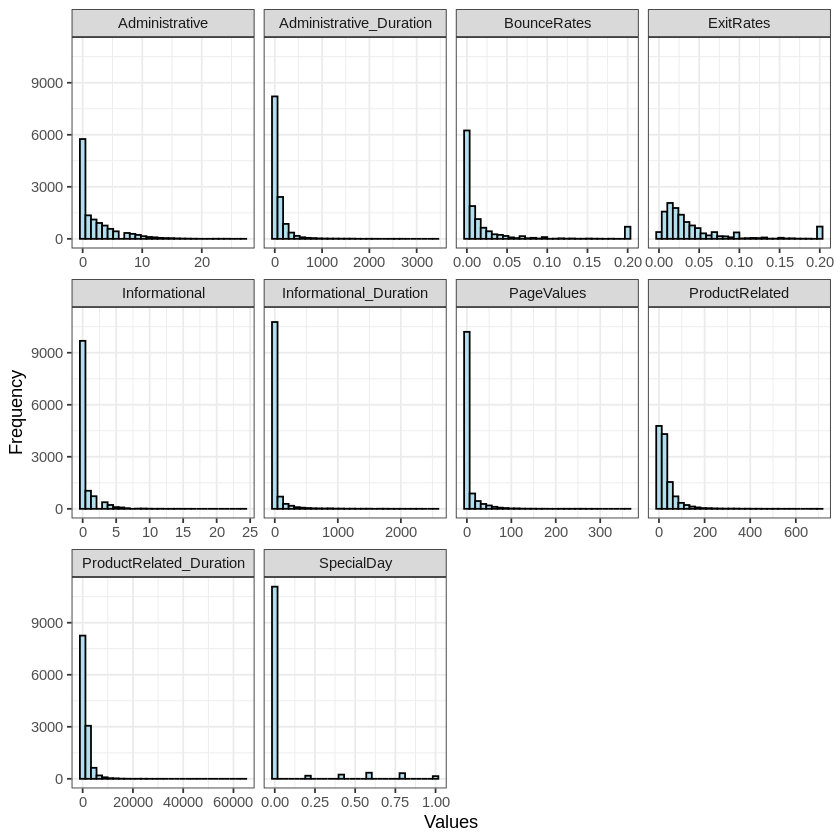

In [10]:
# Let’s visualize the variables available in the data. Plot the histogram of each attribute.
# A plot of the first 10 attributes

shop %>%
  gather(attributes, value, 1:10) %>%
  ggplot(aes(x = value)) +
  geom_histogram(fill = 'lightblue2', color = 'black') +
  facet_wrap(~attributes, scales = 'free_x') +
  labs(x="Values", y="Frequency") +
  theme_bw()

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



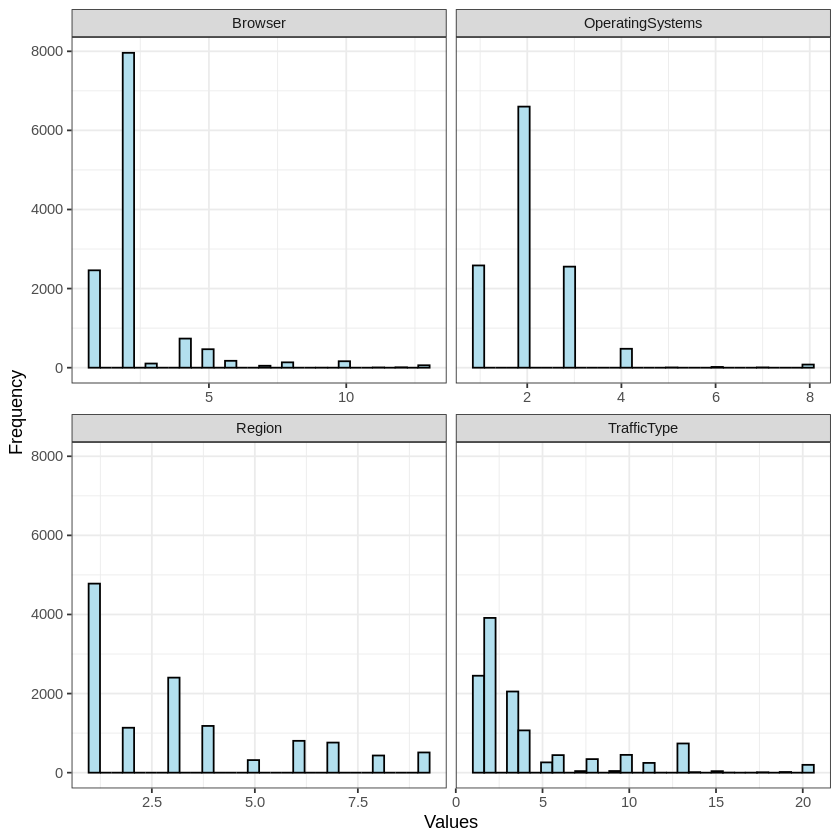

In [11]:
# A histogram of other variables

shop %>%
  gather(attributes, value, 12:15) %>%
  ggplot(aes(x = value)) +
  geom_histogram(fill = 'lightblue2', color = 'black') +
  facet_wrap(~attributes, scales = 'free_x') +
  labs(x="Values", y="Frequency") +
  theme_bw()

## Data Cleaning

In [12]:
# Checking for null values
# We then clean the data using the anyNA() method that checks for any null values.

colSums(is.na(shop))

Administrative Administrative_Duration           Informational 
                     14                      14                      14 
 Informational_Duration          ProductRelated ProductRelated_Duration 
                     14                      14                      14 
            BounceRates               ExitRates              PageValues 
                     14                      14                       0 
             SpecialDay                   Month        OperatingSystems 
                      0                       0                       0 
                Browser                  Region             TrafficType 
                      0                       0                       0 
            VisitorType                 Weekend                 Revenue 
                      0                       0                       0

In [13]:
# Filling missing values with their respective means
# The T represents TRUE function

shop$Administrative[is.na(shop$Administrative)] <- mean(shop$Administrative, na.rm = T)
shop$Administrative_Duration[is.na(shop$Administrative_Duration)] <- mean(shop$Administrative_Duration, na.rm = T)
shop$Informational[is.na(shop$Informational)] <- mean(shop$Informational, na.rm = T)
shop$Informational_Duration[is.na(shop$Informational_Duration)] <- mean(shop$Informational_Duration, na.rm = T)
shop$ProductRelated[is.na(shop$ProductRelated)] <- mean(shop$ProductRelated, na.rm = T)
shop$ProductRelated_Duration[is.na(shop$ProductRelated_Duration)] <- mean(shop$ProductRelated_Duration, na.rm = T)
shop$BounceRates[is.na(shop$BounceRates)] <- mean(shop$BounceRates, na.rm = T)
shop$ExitRates[is.na(shop$ExitRates)] <- mean(shop$ExitRates, na.rm = T)

In [14]:
# Checking for any left null values

anyNA(shop)

[1] FALSE

# **EDA**

## Univariate

In [15]:
# Viewing the statistical summary of the dataset
# Shows the mean, median, minimum, maximum, mode, 1st and 3rd quartile of each numeric column in the dataset
# Measures of centrality are mean, median. 
# Measures of spread are standard deviation, quantiles, min and max, range, interquartile range.

summary(shop) 

 Administrative   Administrative_Duration Informational   
 Min.   : 0.000   Min.   :  -1.00         Min.   : 0.000  
 1st Qu.: 0.000   1st Qu.:   0.00         1st Qu.: 0.000  
 Median : 1.000   Median :   8.00         Median : 0.000  
 Mean   : 2.318   Mean   :  80.91         Mean   : 0.504  
 3rd Qu.: 4.000   3rd Qu.:  93.26         3rd Qu.: 0.000  
 Max.   :27.000   Max.   :3398.75         Max.   :24.000  
                                                          
 Informational_Duration ProductRelated   ProductRelated_Duration
 Min.   :  -1.00        Min.   :  0.00   Min.   :   -1.0        
 1st Qu.:   0.00        1st Qu.:  7.00   1st Qu.:  185.3        
 Median :   0.00        Median : 18.00   Median :  601.1        
 Mean   :  34.51        Mean   : 31.76   Mean   : 1196.0        
 3rd Qu.:   0.00        3rd Qu.: 38.00   3rd Qu.: 1464.2        
 Max.   :2549.38        Max.   :705.00   Max.   :63973.5        
                                                                
  Bounce

In [16]:
# This function provides the ones most useful for scale construction and item analysis in classic psychometrics. 
# Range is most useful for the first pass in a data set, to check for coding errors.

install.packages("psych")
library(psych)

# Describing the dataset
describe(shop)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘tmvnsim’, ‘mnormt’



Attaching package: ‘psych’


The following objects are masked from ‘package:ggplot2’:

    %+%, alpha


Warning message in FUN(newX[, i], ...):
“no non-missing arguments to min; returning Inf”
Warning message in FUN(newX[, i], ...):
“no non-missing arguments to max; returning -Inf”


,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Administrative,1,12330,2.317798e+00,3.320867e+00,1.0000000,1.632649e+00,1.482600e+00,0,27.0000,27.0000,1.95951230,4.6995298,2.990680e-02
Administrative_Duration,2,12330,8.090618e+01,1.767600e+02,8.0000000,4.221326e+01,1.186080e+01,-1,3398.7500,3399.7500,5.61478319,50.5390640,1.591851e+00
Informational,3,12330,5.039786e-01,1.269980e+00,0.0000000,1.784322e-01,0.000000e+00,0,24.0000,24.0000,4.03613218,26.9272764,1.143708e-02
Informational_Duration,4,12330,3.450639e+01,1.407455e+02,0.0000000,3.633578e+00,0.000000e+00,-1,2549.3750,2550.3750,7.57724103,76.2737874,1.267515e+00
ProductRelated,5,12330,3.176388e+01,4.446507e+01,18.0000000,2.278636e+01,1.927380e+01,0,705.0000,705.0000,4.34163147,31.2122551,4.004400e-01
ProductRelated_Duration,6,12330,1.196037e+03,1.913285e+03,601.0598739,8.216794e+02,7.450582e+02,-1,63973.5222,63974.5222,7.26404890,137.1880857,1.723051e+01
BounceRates,7,12330,2.215246e-02,4.839963e-02,0.0031250,8.643208e-03,4.633125e-03,0,0.2000,0.2000,2.95342471,7.7611787,4.358735e-04
ExitRates,8,12330,4.300254e-02,4.849974e-02,0.0251564,3.207784e-02,2.101653e-02,0,0.2000,0.2000,2.15345209,4.0447400,4.367751e-04
PageValues,9,12330,5.889258e+00,1.856844e+01,0.0000000,1.291085e+00,0.000000e+00,0,361.7637,361.7637,6.38141130,65.5974655,1.672221e-01


* trimed is the eman after elimination of some rows to calculate the mean and see if the mean will change much i.e. the removed rows to what extent do they affect the true mean
* se is the standard error of the error term

* The skewness and Kurtosis are defined above.
* Our dataset is skeweed to the right i.e. it has a positive skewness


## Bivariate analysis

In [17]:
# Pearson correlation matrix for the numeric variables
cor(shop[,1:10])

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay
Administrative,1.00000000,0.60146617,0.37678191,0.25575699,0.43083240,0.37364696,-0.22347356,-0.3161922,0.09876556,-0.09504852
Administrative_Duration,0.60146617,1.00000000,0.30264662,0.23795860,0.28886939,0.35523845,-0.14412830,-0.2056184,0.06745866,-0.07346834
Informational,0.37678191,0.30264662,1.00000000,0.61896515,0.37409771,0.38744622,-0.11607084,-0.1635385,0.04853605,-0.04832568
Informational_Duration,0.25575699,0.23795860,0.61896515,1.00000000,0.27996566,0.34730003,-0.07407670,-0.1052046,0.03078511,-0.03065659
ProductRelated,0.43083240,0.28886939,0.37409771,0.27996566,1.00000000,0.86086816,-0.20446907,-0.2922194,0.05606376,-0.02418894
ProductRelated_Duration,0.37364696,0.35523845,0.38744622,0.34730003,0.86086816,1.00000000,-0.18440884,-0.2516447,0.05261967,-0.03659585
BounceRates,-0.22347356,-0.14412830,-0.11607084,-0.07407670,-0.20446907,-0.18440884,1.00000000,0.9134364,-0.11934976,0.07308382
ExitRates,-0.31619224,-0.20561843,-0.16353853,-0.10520464,-0.29221942,-0.25164475,0.91343642,1.0000000,-0.17438709,0.10289326
PageValues,0.09876556,0.06745866,0.04853605,0.03078511,0.05606376,0.05261967,-0.11934976,-0.1743871,1.00000000,-0.06354127
SpecialDay,-0.09504852,-0.07346834,-0.04832568,-0.03065659,-0.02418894,-0.03659585,0.07308382,0.1028933,-0.06354127,1.00000000


In [18]:
# Spearman correlation matrix for the numeric variables
cor(shop[,1:10], method = "spearman")

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay
Administrative,1.0000000,0.9393368,0.369619185,0.365321859,0.45967227,0.42097570,-0.154730293,-0.4329209,0.32745671,-0.12601681
Administrative_Duration,0.9393368,1.0000000,0.357999446,0.360000840,0.43204966,0.41605831,-0.165498694,-0.4384629,0.31652217,-0.13173514
Informational,0.3696192,0.3579994,1.000000000,0.946096620,0.36931696,0.36816335,0.006902177,-0.1841003,0.21825744,-0.05472400
Informational_Duration,0.3653219,0.3600008,0.946096620,1.000000000,0.36757499,0.36975660,-0.008600413,-0.2049106,0.22337593,-0.05439493
ProductRelated,0.4596723,0.4320497,0.369316958,0.367574985,1.00000000,0.88237634,-0.051660540,-0.5169185,0.34104613,-0.02232422
ProductRelated_Duration,0.4209757,0.4160583,0.368163350,0.369756598,0.88237634,1.00000000,-0.078784408,-0.4747518,0.35935903,-0.05034915
BounceRates,-0.1547303,-0.1654987,0.006902177,-0.008600413,-0.05166054,-0.07878441,1.000000000,0.6034097,-0.12454031,0.13508539
ExitRates,-0.4329209,-0.4384629,-0.184100266,-0.204910627,-0.51691853,-0.47475185,0.603409668,1.0000000,-0.30794236,0.15155241
PageValues,0.3274567,0.3165222,0.218257439,0.223375926,0.34104613,0.35935903,-0.124540309,-0.3079424,1.00000000,-0.07048046
SpecialDay,-0.1260168,-0.1317351,-0.054724001,-0.054394927,-0.02232422,-0.05034915,0.135085394,0.1515524,-0.07048046,1.00000000


In [19]:
# Kendall correlation matrix for the numeric variables
cor(shop[,1:10], method = "kendall")

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay
Administrative,1.0000000,0.8232028,0.320251388,0.31277485,0.34823481,0.31509424,-0.118711292,-0.3185977,0.27347215,-0.11045835
Administrative_Duration,0.8232028,1.0000000,0.304530678,0.30322294,0.31854026,0.30455602,-0.125407041,-0.3181235,0.26024414,-0.11320968
Informational,0.3202514,0.3045307,1.000000000,0.89323353,0.29527213,0.29212091,0.005726405,-0.1451773,0.19815165,-0.05156954
Informational_Duration,0.3127748,0.3032229,0.893233530,1.00000000,0.29057580,0.29037212,-0.007364410,-0.1604426,0.20073808,-0.05067316
ProductRelated,0.3482348,0.3185403,0.295272129,0.29057580,1.00000000,0.71911447,-0.047505675,-0.3664374,0.25858208,-0.01801383
ProductRelated_Duration,0.3150942,0.3045560,0.292120911,0.29037212,0.71911447,1.00000000,-0.057645685,-0.3326307,0.27082157,-0.04035879
BounceRates,-0.1187113,-0.1254070,0.005726405,-0.00736441,-0.04750568,-0.05764568,1.000000000,0.4936391,-0.10636337,0.11551983
ExitRates,-0.3185977,-0.3181235,-0.145177330,-0.16044255,-0.36643741,-0.33263074,0.493639147,1.0000000,-0.24239230,0.12186242
PageValues,0.2734721,0.2602441,0.198151646,0.20073808,0.25858208,0.27082157,-0.106363373,-0.2423923,1.00000000,-0.06530671
SpecialDay,-0.1104583,-0.1132097,-0.051569536,-0.05067316,-0.01801383,-0.04035879,0.115519830,0.1218624,-0.06530671,1.00000000


* Pearson and spearman correlation don't seem to differ much
* They produce nearly similar results if rounder to 1 decimal place

In [20]:
# apply the Pearson's product-moment correlation correlation function 

cor.test(Administrative, Administrative_Duration)

# Produces a variety of results from the p-value, 95% Confidence Interval, the degrees of freedom (df) and also the hypothesis under testing 


	Pearson's product-moment correlation

data:  Administrative and Administrative_Duration
t = 83.545, df = 12314, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.5900731 0.6126198
sample estimates:
      cor 
0.6014662 


In [21]:
# apply the Pearson's product-moment correlation correlation function 

cor.test(Informational, Informational_Duration)

# Produces a variety of results from the p-value, 95% Confidence Interval, the degrees of freedom (df) and also the hypothesis under testing 


	Pearson's product-moment correlation

data:  Informational and Informational_Duration
t = 87.451, df = 12314, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.6079498 0.6297422
sample estimates:
      cor 
0.6189651 


In [22]:
# apply the Pearson's product-moment correlation correlation function 

cor.test(ProductRelated, ProductRelated_Duration)

# Produces a variety of results from the p-value, 95% Confidence Interval, the degrees of freedom (df) and also the hypothesis under testing 


	Pearson's product-moment correlation

data:  ProductRelated and ProductRelated_Duration
t = 187.74, df = 12314, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.8562250 0.8653723
sample estimates:
      cor 
0.8608682 


In [23]:
# A covariance matrix for the numeric variables

cov(shop[,1:10])

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay
Administrative,11.02815627,353.058461,1.589052470,119.5400648,63.6178244,2374.06520,-3.591862e-02,-5.092629e-02,6.0902109,-6.278694e-02
Administrative_Duration,353.05846080,31244.093350,67.938591615,5919.9751451,2270.4110511,120138.90339,-1.233035e+00,-1.762728e+00,221.4098867,-2.583192e+00
Informational,1.58905247,67.938592,1.612848167,110.6362531,21.1251983,941.42971,-7.134472e-03,-1.007294e-02,1.1445547,-1.220808e-02
Informational_Duration,119.54006484,5919.975145,110.636253147,19809.2959423,1752.0975353,93523.13791,-5.046127e-01,-7.181395e-01,80.4545305,-8.582837e-01
ProductRelated,63.61782436,2270.411051,21.125198286,1752.0975353,1977.1426211,73237.81448,-4.400364e-01,-6.301842e-01,46.2888645,-2.139481e-01
ProductRelated_Duration,2374.06519930,120138.903392,941.429711465,93523.1379081,73237.8144751,3660660.57981,-1.707668e+01,-2.335108e+01,1869.4039417,-1.392785e+01
BounceRates,-0.03591862,-1.233035,-0.007134472,-0.5046127,-0.4400364,-17.07668,2.342524e-03,2.144173e-03,-0.1072603,7.036161e-04
ExitRates,-0.05092629,-1.762728,-0.010072940,-0.7181395,-0.6301842,-23.35108,2.144173e-03,2.352225e-03,-0.1570468,9.926561e-04
PageValues,6.09021088,221.409887,1.144554674,80.4545305,46.2888645,1869.40394,-1.072603e-01,-1.570468e-01,344.7868381,-2.346949e-01
SpecialDay,-0.06278694,-2.583192,-0.012208076,-0.8582837,-0.2139481,-13.92785,7.036161e-04,9.926561e-04,-0.2346949,3.956808e-02


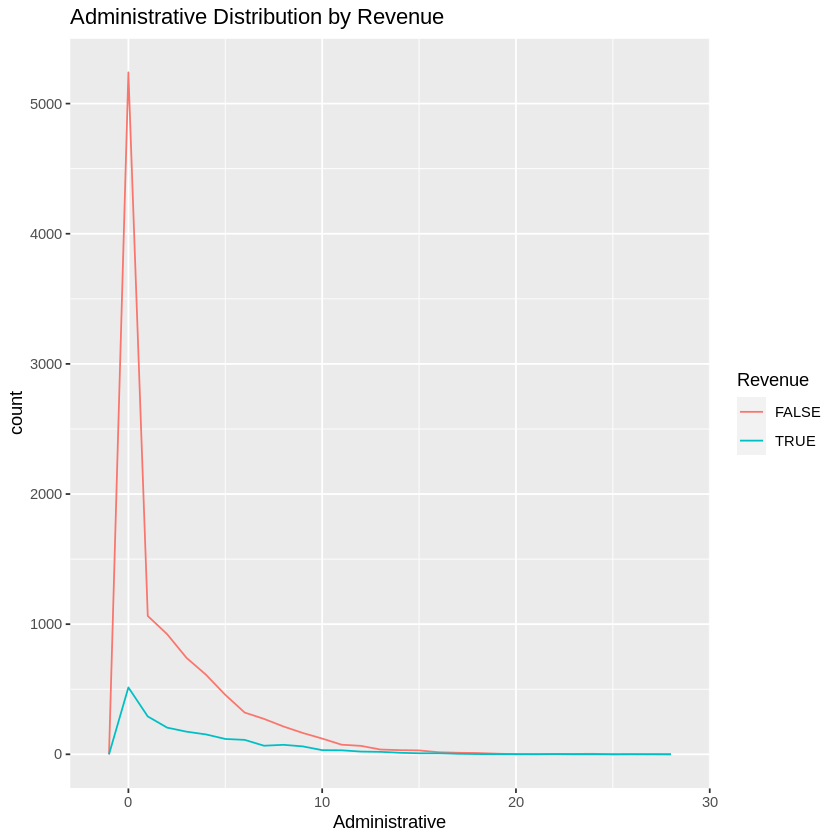

In [24]:
# Creating some visualisations to take a look at each variable
# Visualisation 1
# 
ggplot(shop, aes(Administrative, colour = Revenue)) +
geom_freqpoly(binwidth = 1) + labs(title="Administrative Distribution by Revenue")

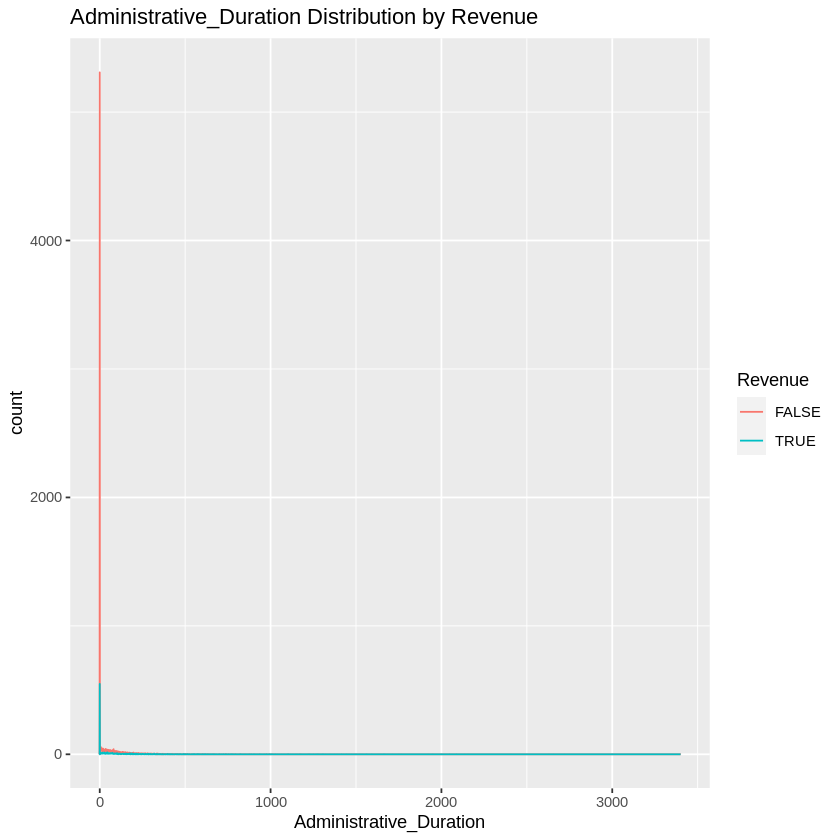

In [25]:
# Visualisation 2
# ---
# 
ggplot(shop, aes(Administrative_Duration, colour = Revenue)) +
geom_freqpoly(binwidth = 1) + labs(title="Administrative_Duration Distribution by Revenue")

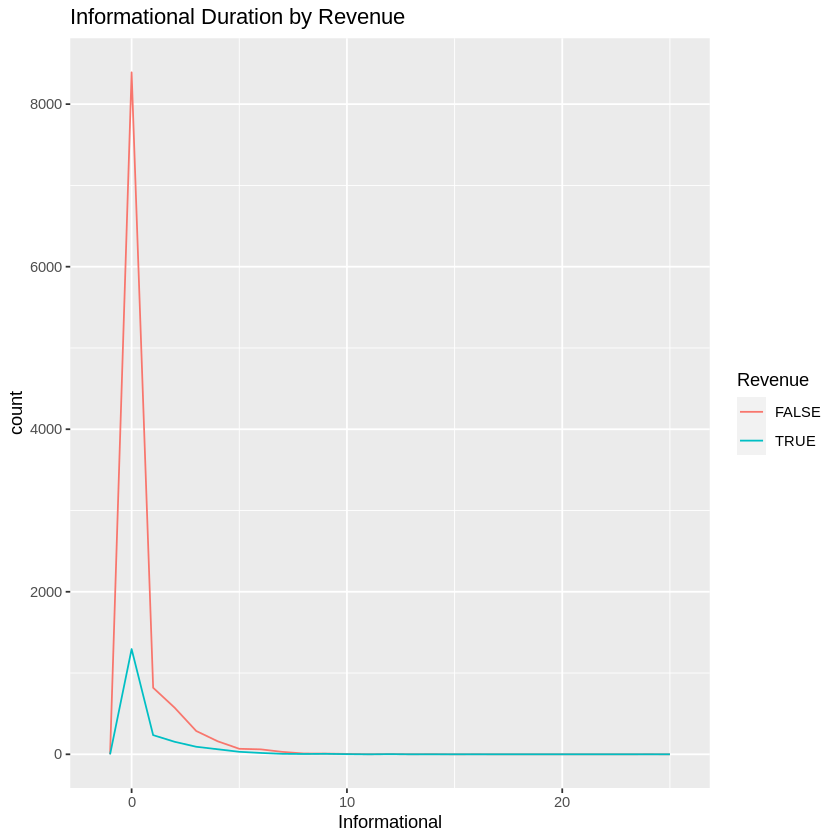

In [26]:
# Visualisation 3
# 
ggplot(shop, aes(Informational, colour = Revenue)) +
geom_freqpoly(binwidth = 1) + labs(title="Informational Duration by Revenue")

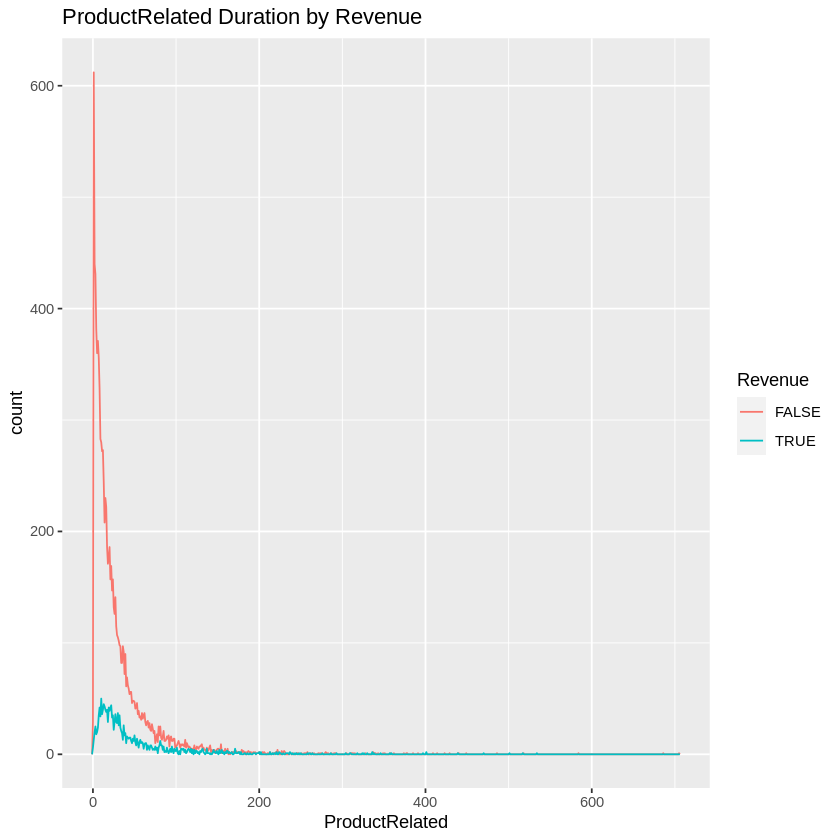

In [27]:
# Visualisation 4
# ---
# 
ggplot(shop, aes(ProductRelated, colour = Revenue)) +
geom_freqpoly(binwidth = 1) + labs(title="ProductRelated Duration by Revenue")

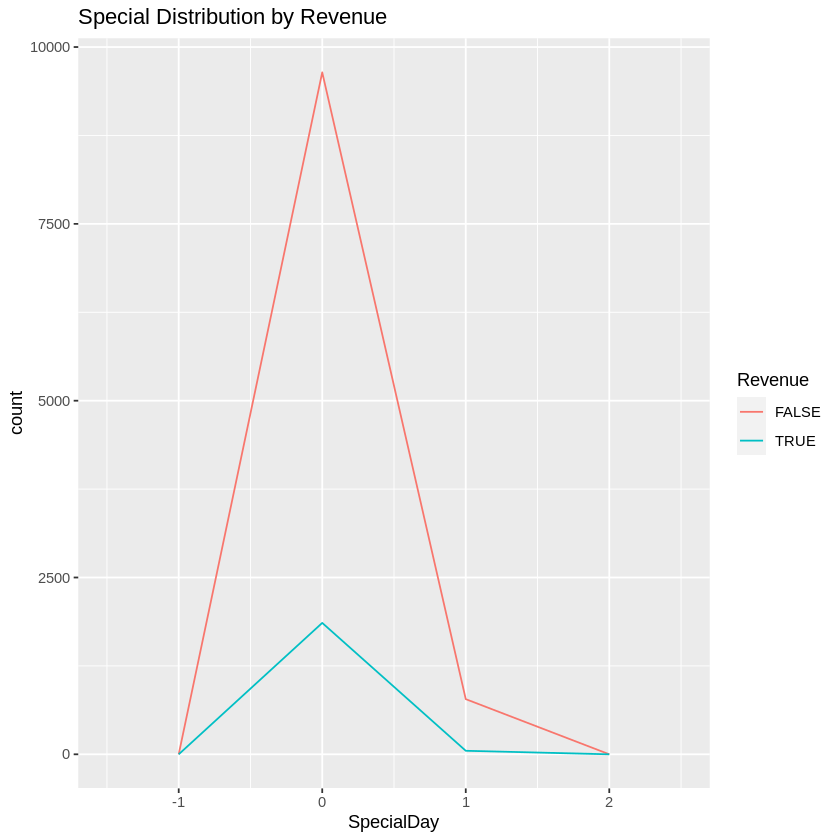

In [28]:
# Visualisation 5
# ---
# 
ggplot(shop, aes(SpecialDay, colour = Revenue)) +
geom_freqpoly(binwidth = 1) + labs(title="Special Distribution by Revenue")

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 14 rows containing non-finite values (stat_bin).”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 14 rows containing non-finite values (stat_bin).”


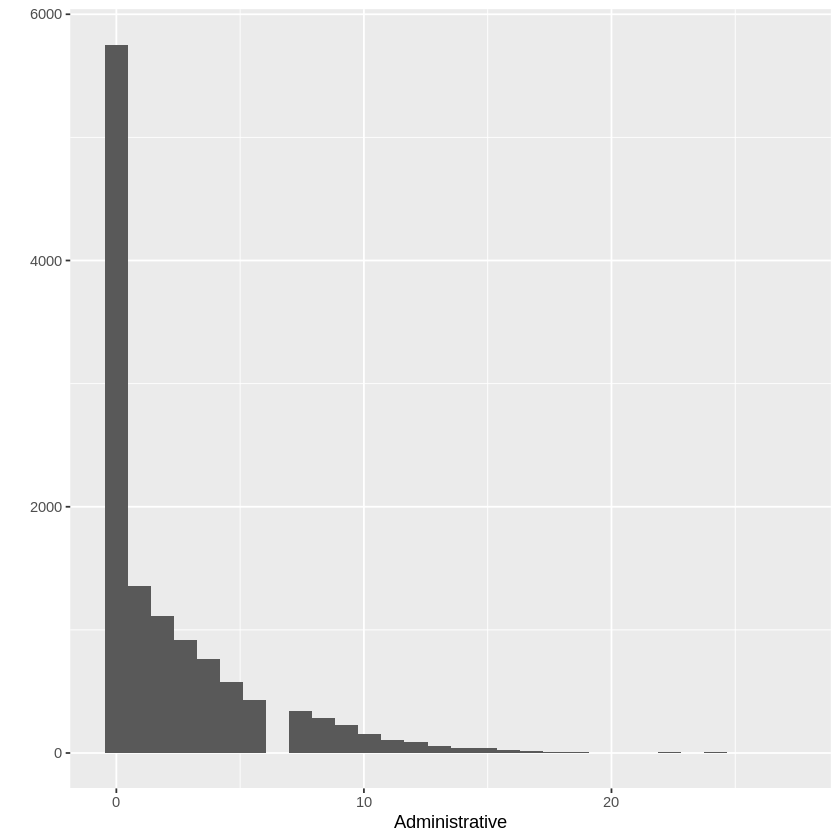

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 14 rows containing non-finite values (stat_bin).”


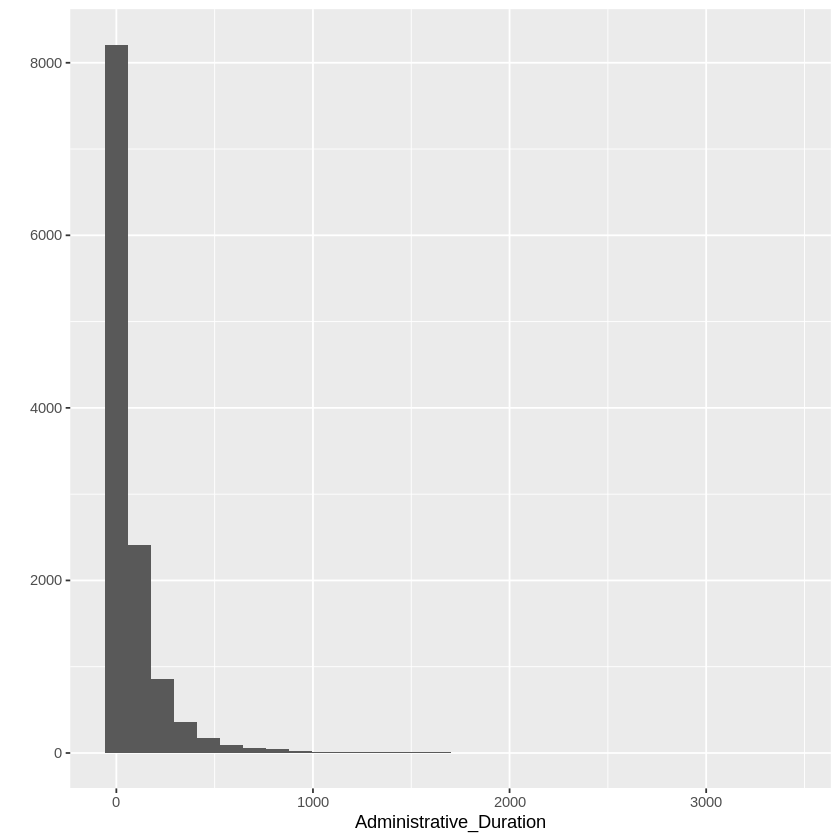

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 14 rows containing non-finite values (stat_bin).”


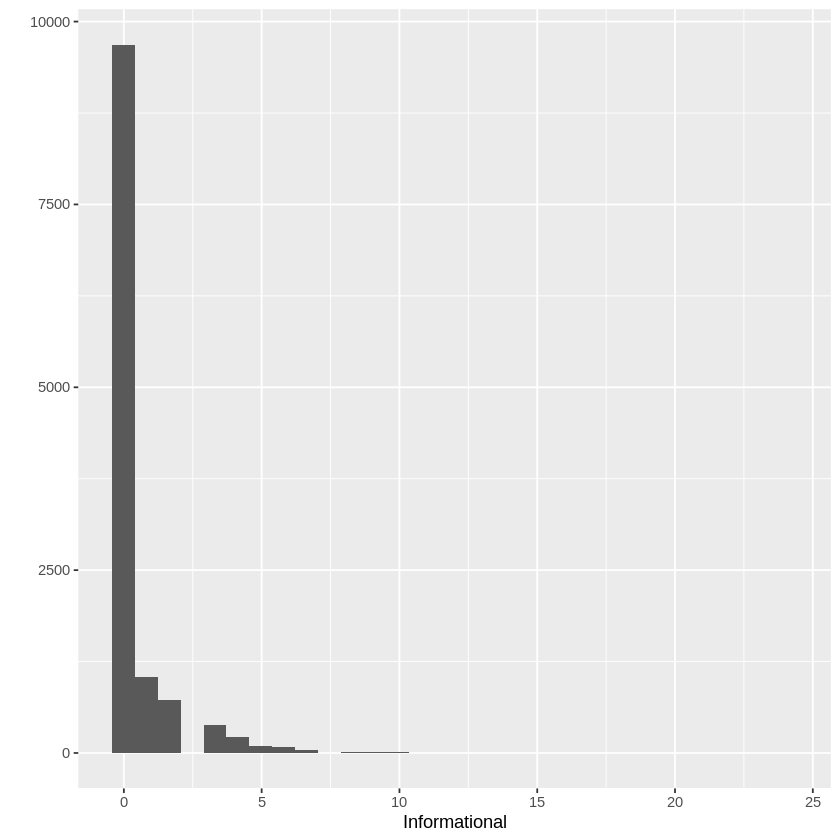

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 14 rows containing non-finite values (stat_bin).”


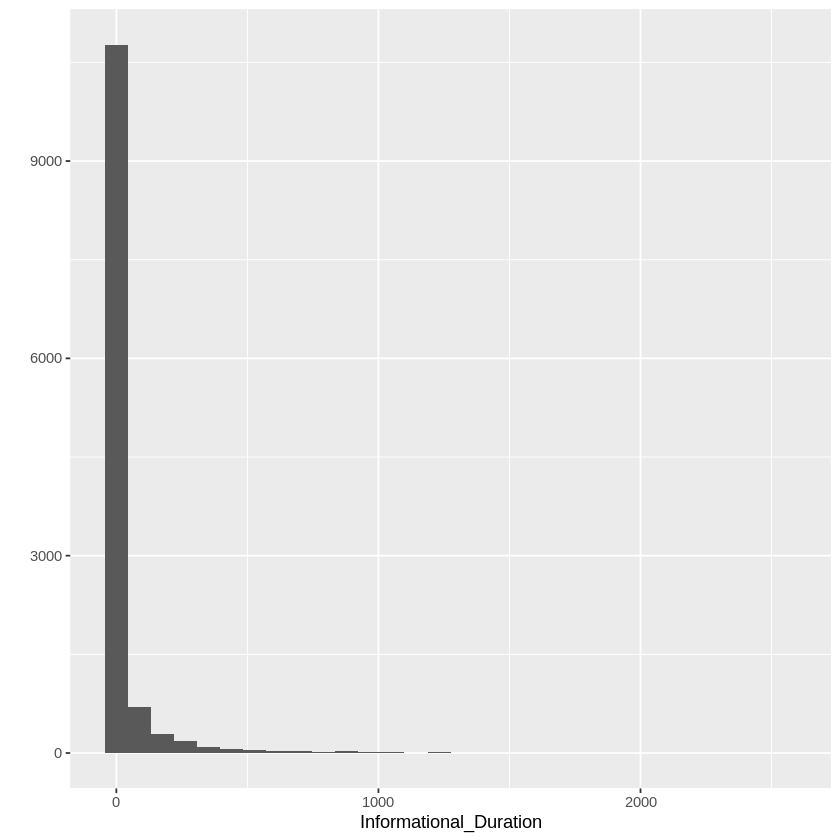

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 14 rows containing non-finite values (stat_bin).”


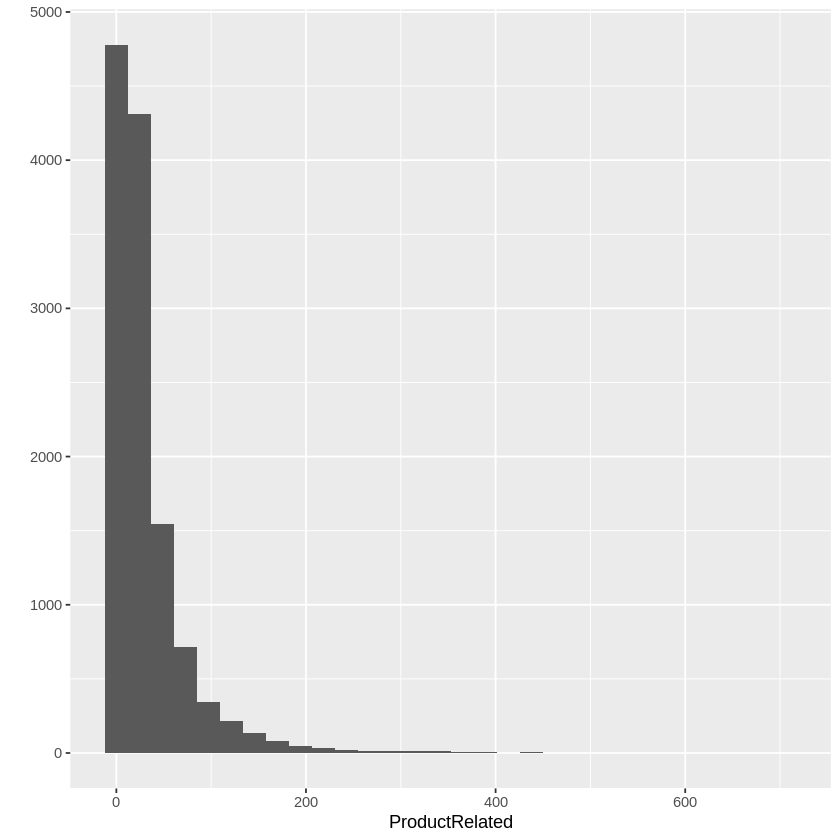

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 14 rows containing non-finite values (stat_bin).”


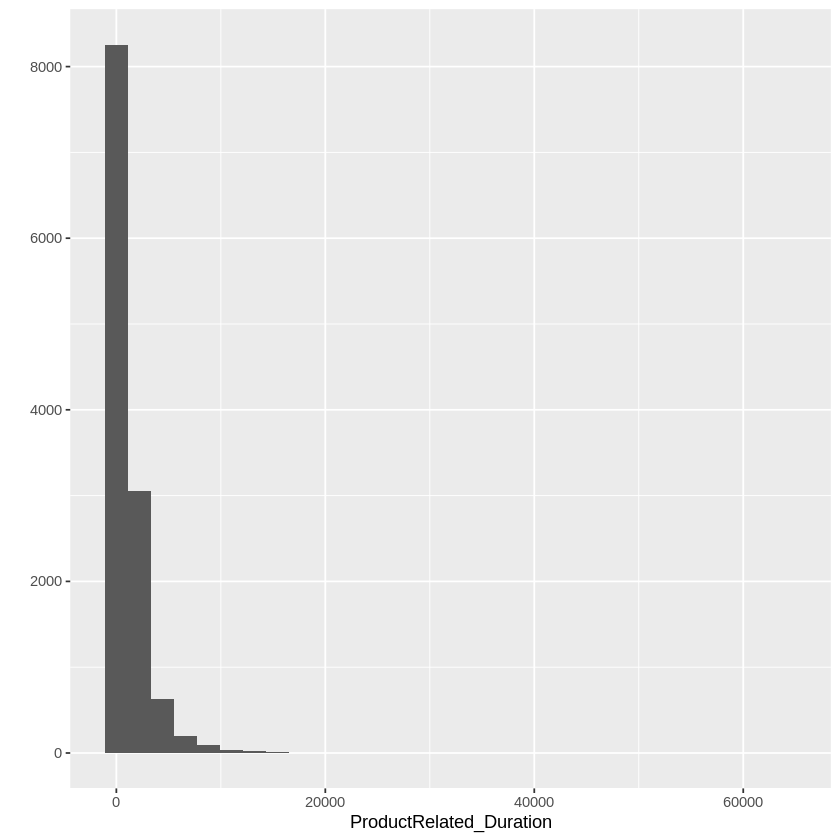

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 14 rows containing non-finite values (stat_bin).”


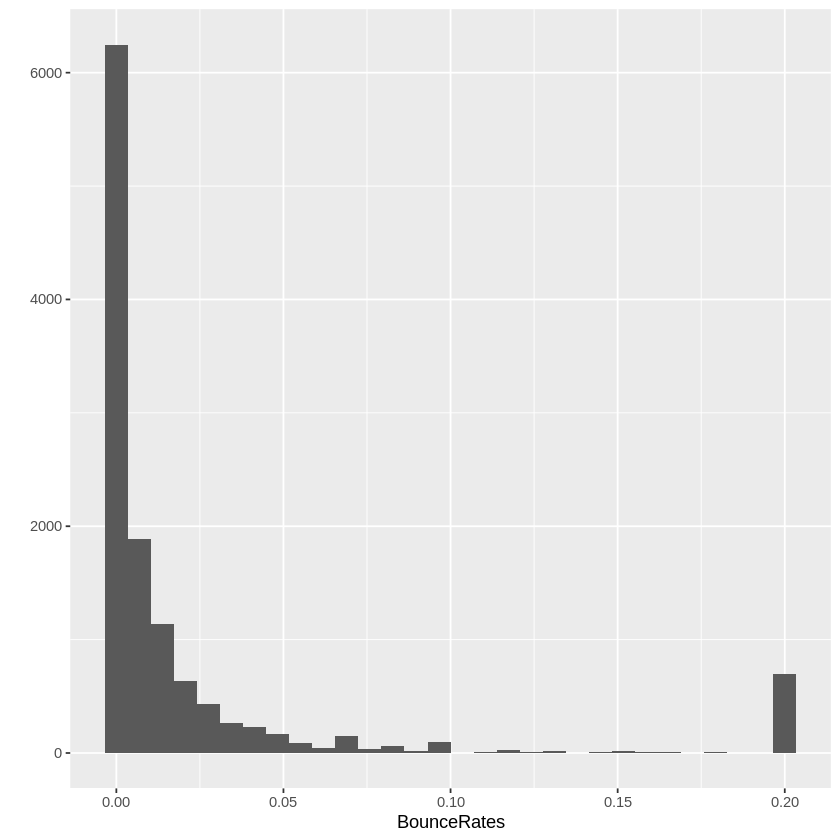

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



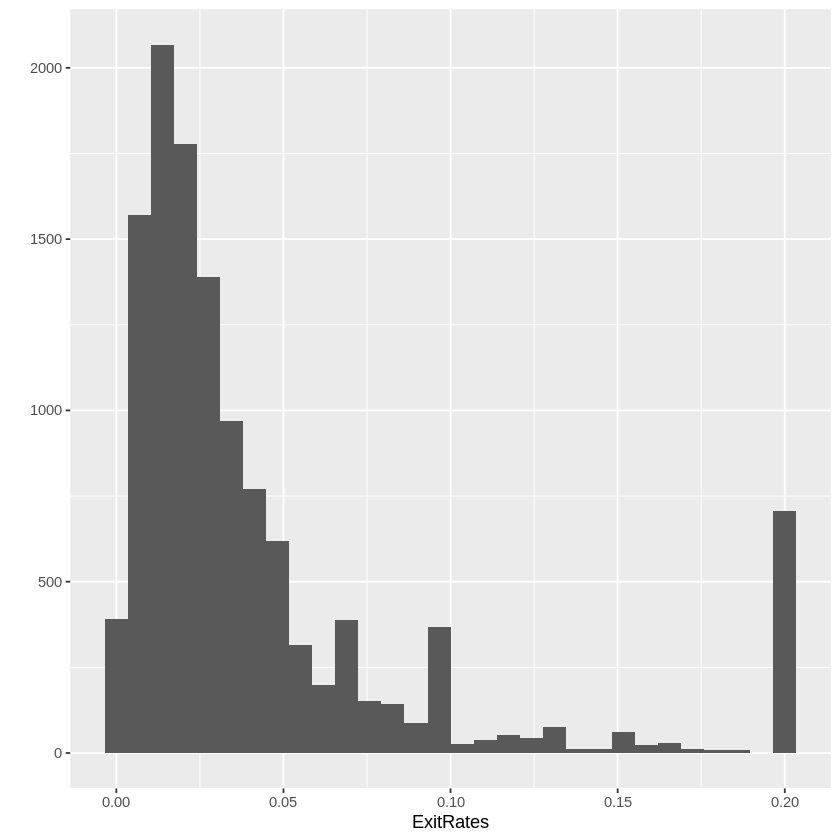

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



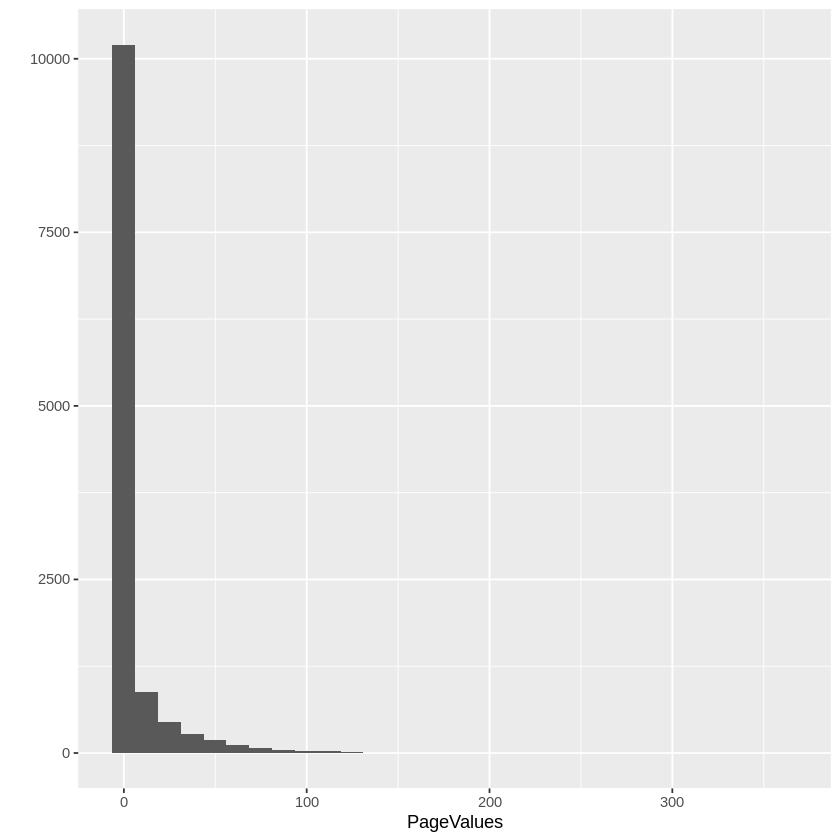

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



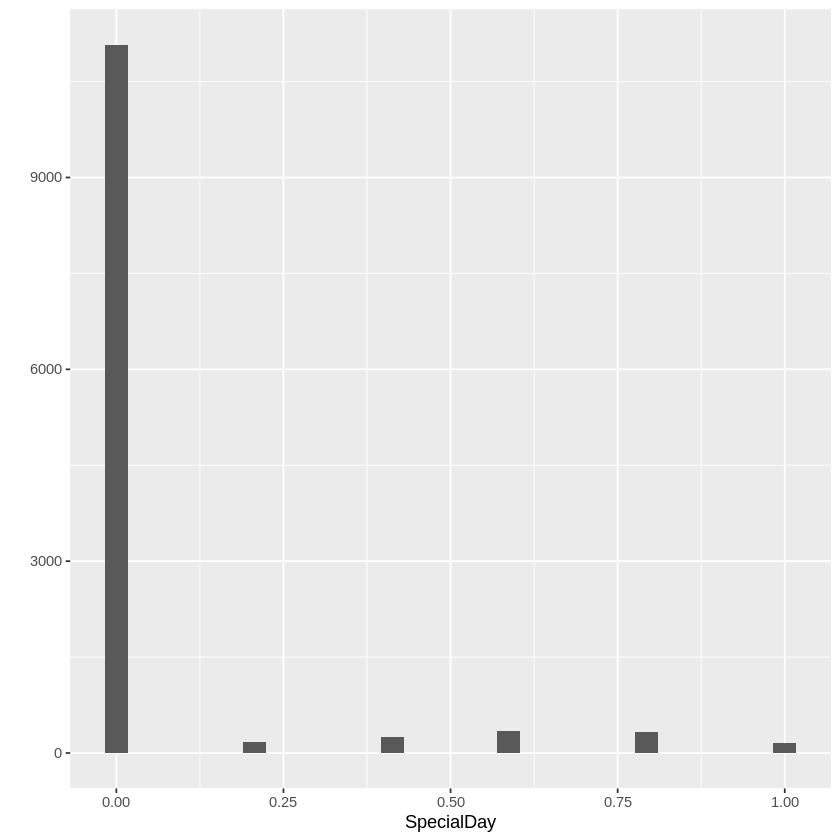

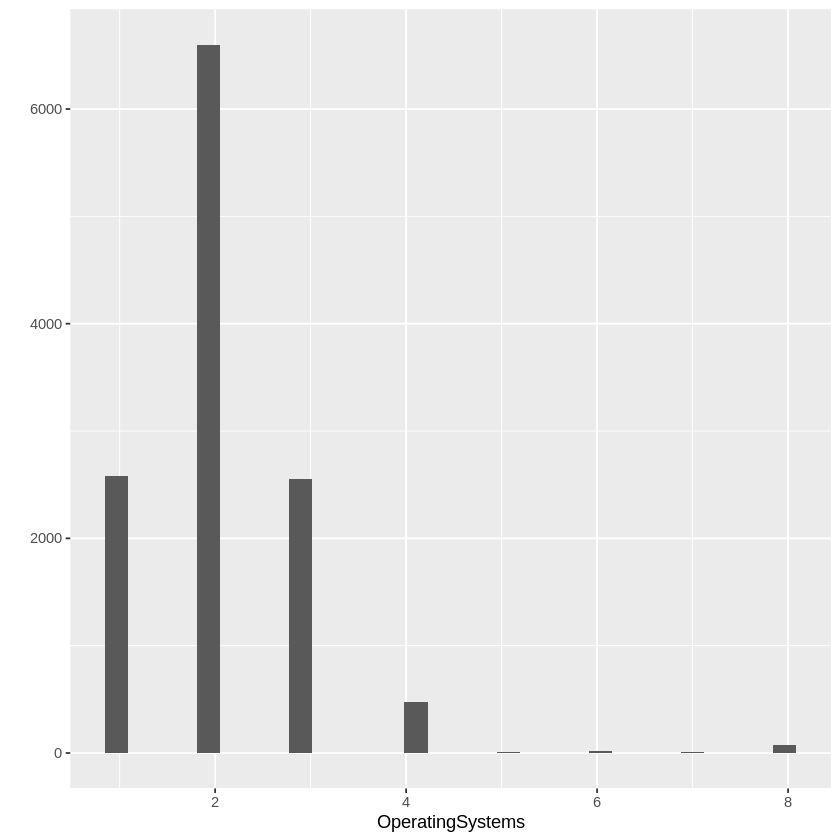

In [29]:
# A qplot of the df dataset

library(ggplot2)

par(mfrow=c(3,1))

qplot(Administrative)
qplot(Administrative_Duration)
qplot(Informational)
qplot(Informational_Duration)
qplot(ProductRelated)
qplot(ProductRelated_Duration)
qplot(BounceRates)
qplot(ExitRates)
qplot(PageValues)
qplot(SpecialDay)
qplot(OperatingSystems)


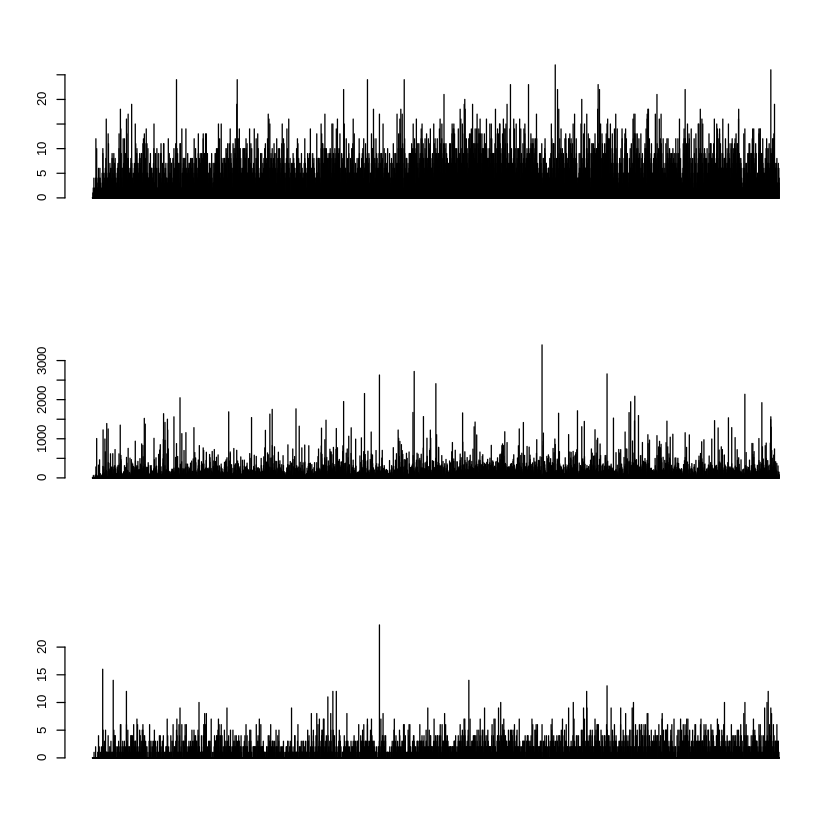

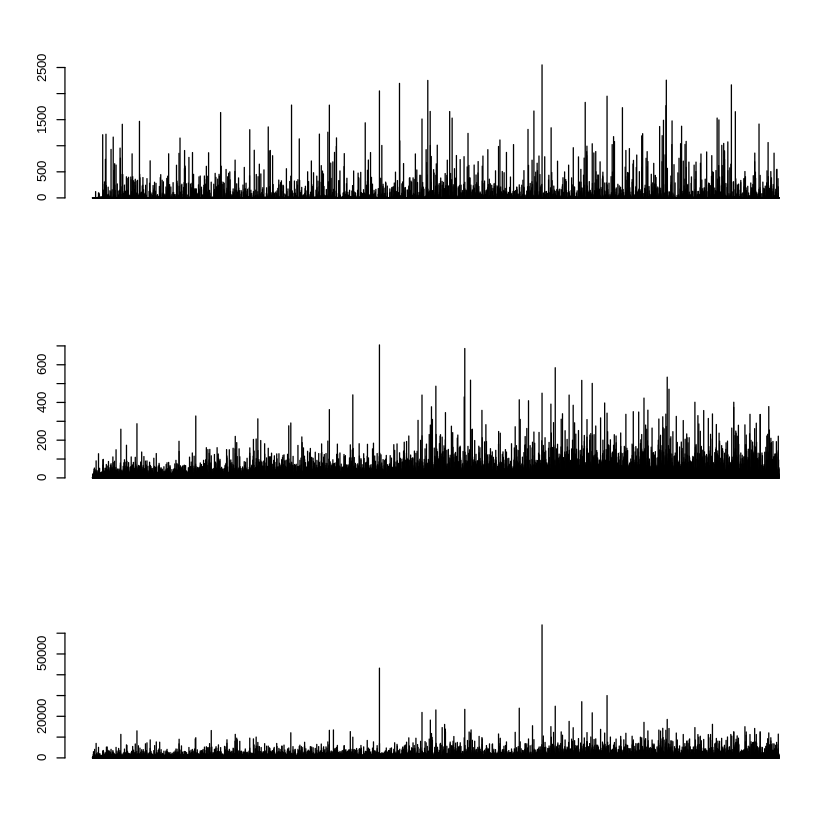

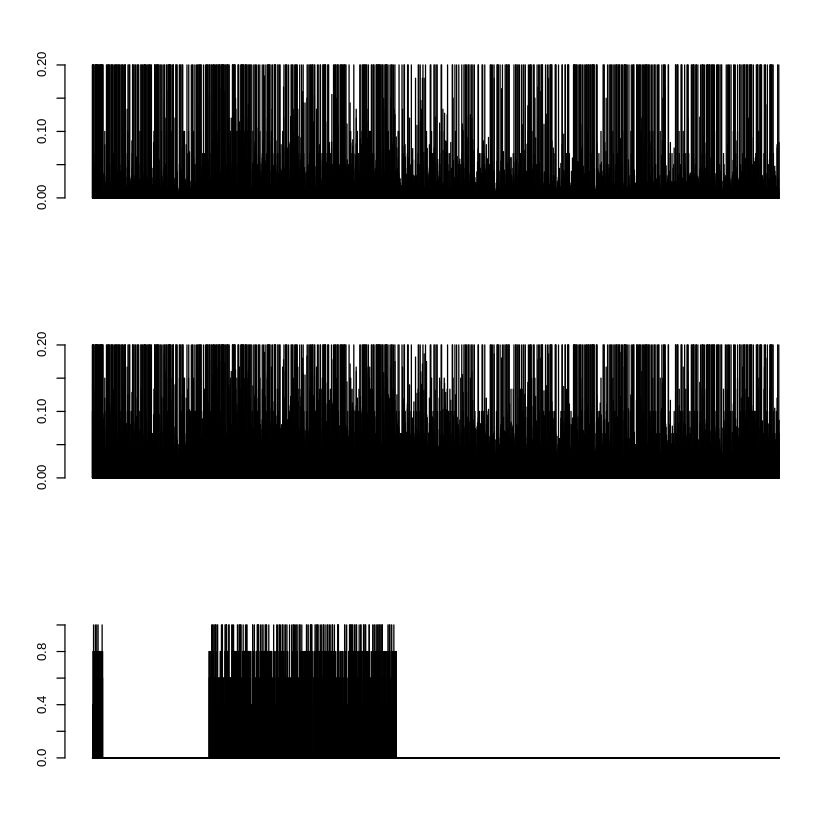

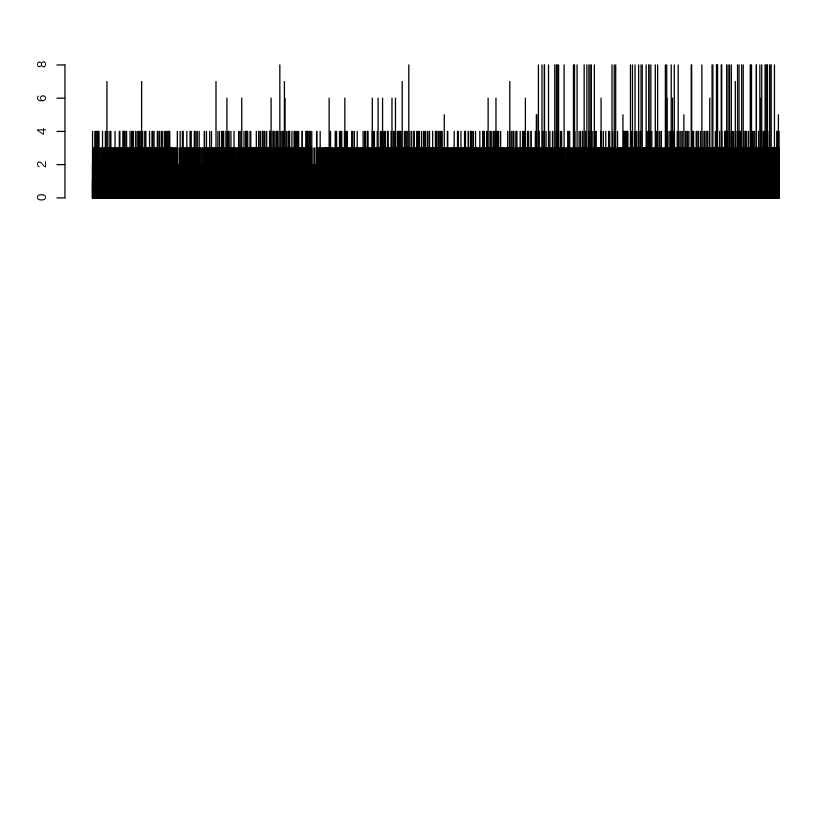

In [30]:
# 3 figures arranged in 3 rows and 1 column
# Combined barplot for the numeric dataset

par(mfrow=c(3,1))

barplot(Administrative)
barplot(Administrative_Duration)
barplot(Informational)
barplot(Informational_Duration)
barplot(ProductRelated)
barplot(ProductRelated_Duration)
barplot(BounceRates)
barplot(ExitRates)
barplot(SpecialDay)
barplot(OperatingSystems)

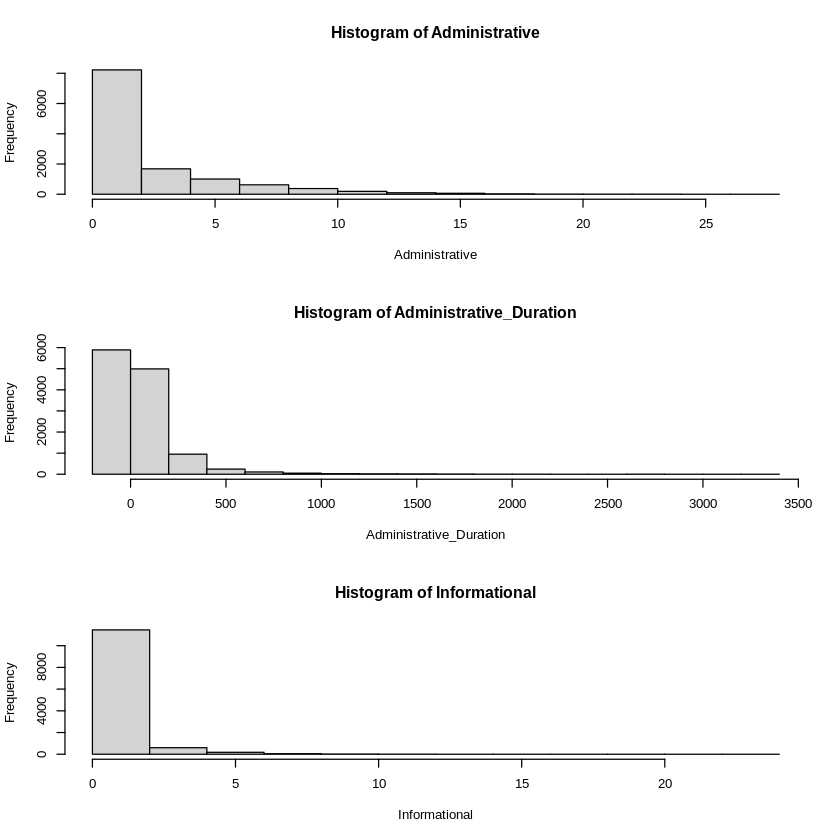

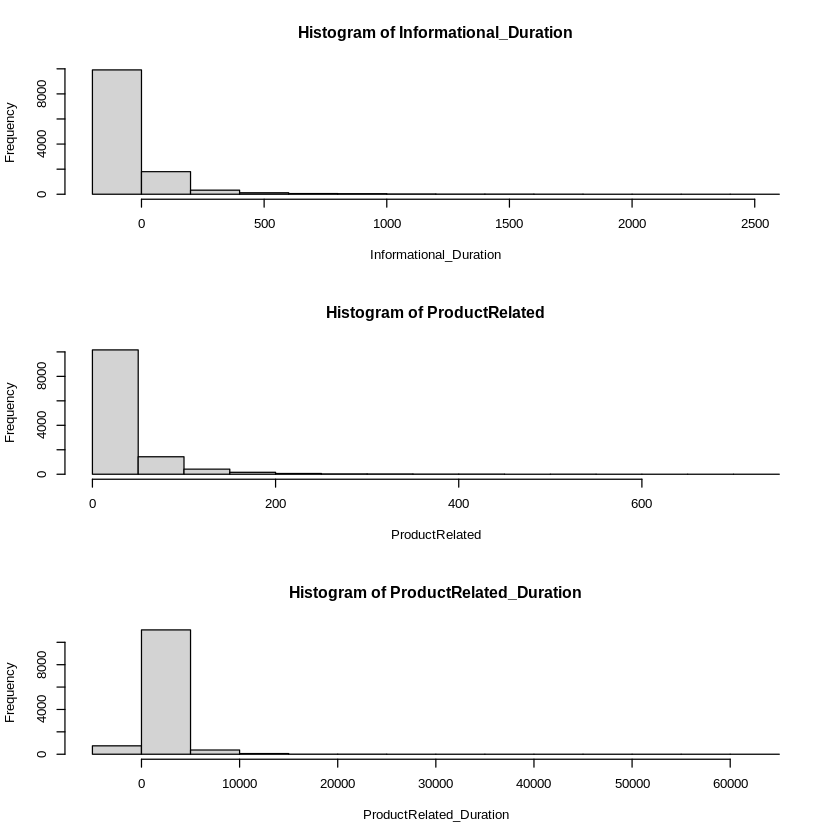

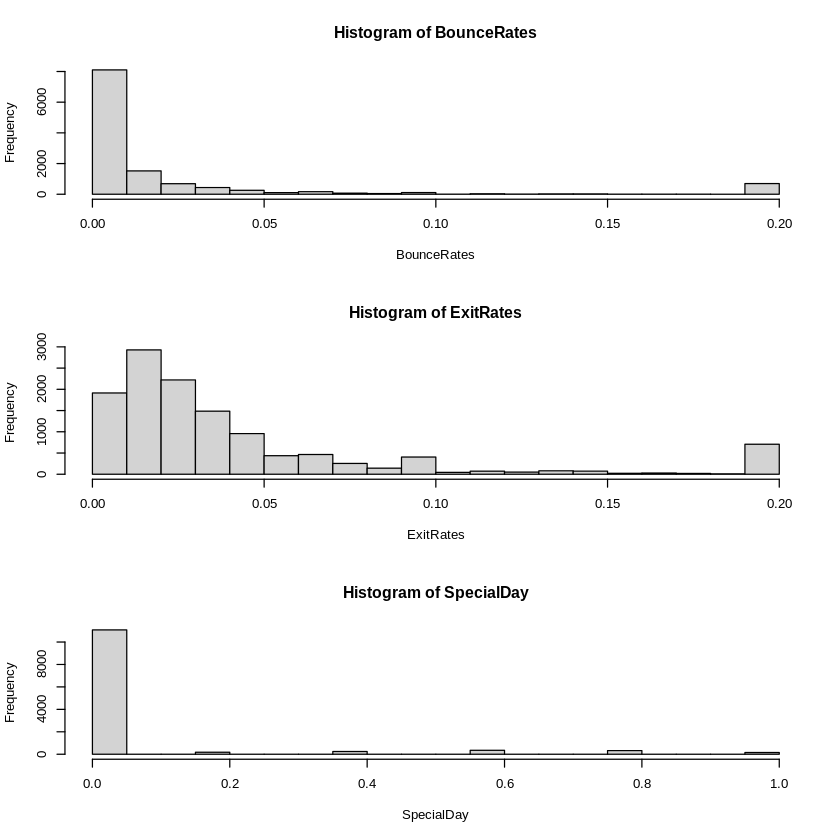

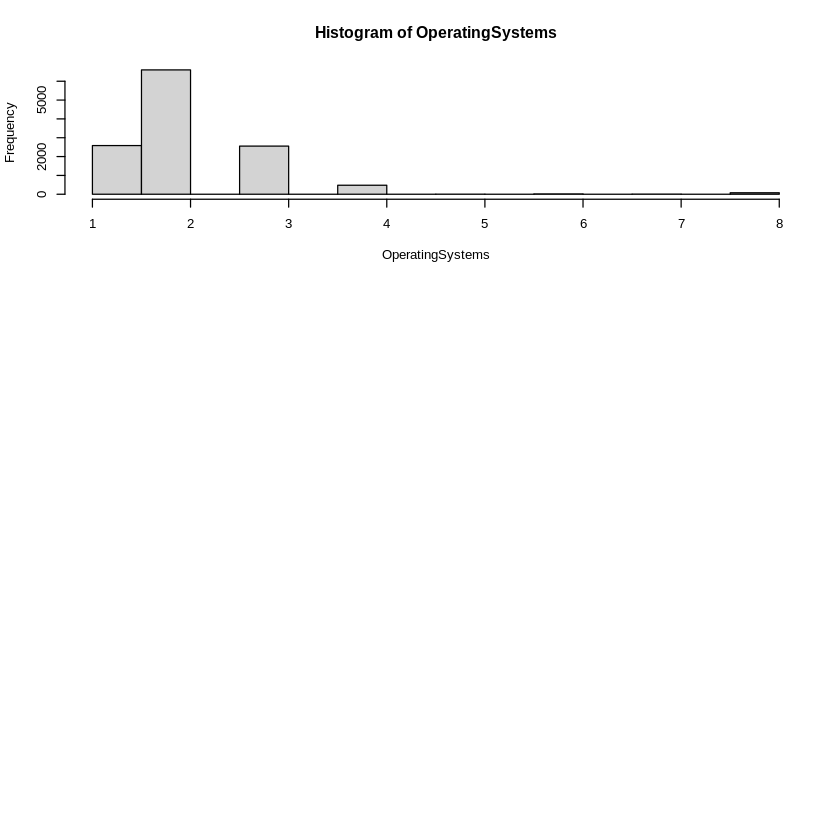

In [31]:
# 3 figures arranged in 3 rows and 1 column

par(mfrow=c(3,1))

hist(Administrative)
hist(Administrative_Duration)
hist(Informational)
hist(Informational_Duration)
hist(ProductRelated)
hist(ProductRelated_Duration)
hist(BounceRates)
hist(ExitRates)
hist(SpecialDay)
hist(OperatingSystems)

# K-Means Clustering

In [32]:
# Installing relevant packages

install.packages("corrplot")
library(corrplot)

install.packages("gridExtra")
library(gridExtra)

install.packages("GGally")
library(GGally)

install.packages("cluster")
library(cluster) # clustering algorithms 

install.packages("factoextra")
library(factoextra) # clustering algorithms & visualization

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

corrplot 0.84 loaded

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘plyr’, ‘reshape’


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘matrixStats’, ‘RcppArmadillo’, ‘zip’, ‘SparseM’, ‘MatrixModels’, ‘conquer’, ‘sp’, ‘data.table’, ‘openxlsx’, ‘minqa’, ‘nloptr’, ‘statmod’, ‘RcppEigen’, ‘carData’, ‘pbkrtest’, ‘quantreg’, ‘maptools’, ‘rio’, ‘lme4’, ‘viridis’, ‘car’, ‘ellipse’, ‘flashClust’, ‘leaps’, ‘scatterplot3d’, ‘ggsci’, ‘c

In [33]:
# Preprocessing the dataset

shop.new<- shop[, c(1, 2, 3, 4,5,6,7,8,9,10,11,12,13,14,15,16,17)]
shop.new1<- shop[, c(1, 2, 3, 4,5,6,7,8,9,10,12,13,14,15)]
shop.class<- shop[, "Revenue"]
head(shop.new1)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>
1,0,0,0,0,1,0.000000,0.20000000,0.2000000,0,0,1,1,1,1
2,0,0,0,0,2,64.000000,0.00000000,0.1000000,0,0,2,2,1,2
3,0,-1,0,-1,1,-1.000000,0.20000000,0.2000000,0,0,4,1,9,3
4,0,0,0,0,2,2.666667,0.05000000,0.1400000,0,0,3,2,2,4
5,0,0,0,0,10,627.500000,0.02000000,0.0500000,0,0,3,3,1,4
6,0,0,0,0,19,154.216667,0.01578947,0.0245614,0,0,2,2,1,3


In [34]:
# We can normalise the data using the mean and standard deviation, also we can use scale function to normalise our data.

shopNorm <- as.data.frame(scale(shop.new1))
head(shopNorm)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-0.6979497,-0.4577177,-0.3968399,-0.2451687,-0.6918663,-0.6251222,3.6745644,3.2370784,-0.317165,-0.3088088,-1.2333763,-0.7902608,-0.8941422,-0.76259811
2,-0.6979497,-0.4577177,-0.3968399,-0.2451687,-0.6693767,-0.5916719,-0.4576990,1.1752117,-0.317165,-0.3088088,-0.1360728,-0.2079435,-0.8941422,-0.51416134
3,-0.6979497,-0.4633751,-0.3968399,-0.2522737,-0.6918663,-0.6256448,3.6745644,3.2370784,-0.317165,-0.3088088,2.0585344,-0.7902608,2.4369825,-0.26572458
4,-0.6979497,-0.4577177,-0.3968399,-0.2451687,-0.6693767,-0.6237284,0.5753668,1.9999584,-0.317165,-0.3088088,0.9612308,-0.2079435,-0.4777516,-0.01728781
5,-0.6979497,-0.4577177,-0.3968399,-0.2451687,-0.4894602,-0.2971523,-0.0444727,0.1442783,-0.317165,-0.3088088,0.9612308,0.3743739,-0.8941422,-0.01728781
6,-0.6979497,-0.4577177,-0.3968399,-0.2451687,-0.2870542,-0.5445191,-0.1314677,-0.3802316,-0.317165,-0.3088088,-0.1360728,-0.2079435,-0.8941422,-0.26572458


In [35]:
# Setting the seed to 123

set.seed(123)

# Setting the clusters to 3

shop_K3 <- kmeans(shopNorm, centers = 3, nstart = 25)
print(shop_K3)

K-means clustering with 3 clusters of sizes 9663, 1050, 1617

Cluster means:
  Administrative Administrative_Duration Informational Informational_Duration
1     -0.1801657              -0.1659408    -0.2265264             -0.1870230
2     -0.6833236              -0.4498412    -0.3840913             -0.2447139
3      1.5203653               1.2837471     1.6031046              1.2765323
  ProductRelated ProductRelated_Duration BounceRates  ExitRates    PageValues
1     -0.1750888              -0.1661496   -0.268473 -0.2259052  0.0002790487
2     -0.6450880              -0.5954410    2.975471  2.8265553 -0.3171649820
3      1.4651984               1.3795400   -0.327761 -0.4854431  0.2042837251
     SpecialDay OperatingSystems     Browser      Region  TrafficType
1 -0.0004022033      -0.00468704  0.01605253  0.01926265 -0.006386728
2  0.2484939053       0.06144188 -0.02382029 -0.03717074  0.236354292
3 -0.1589561598      -0.01188813 -0.08046029 -0.09097448 -0.115310482

Clustering vector:

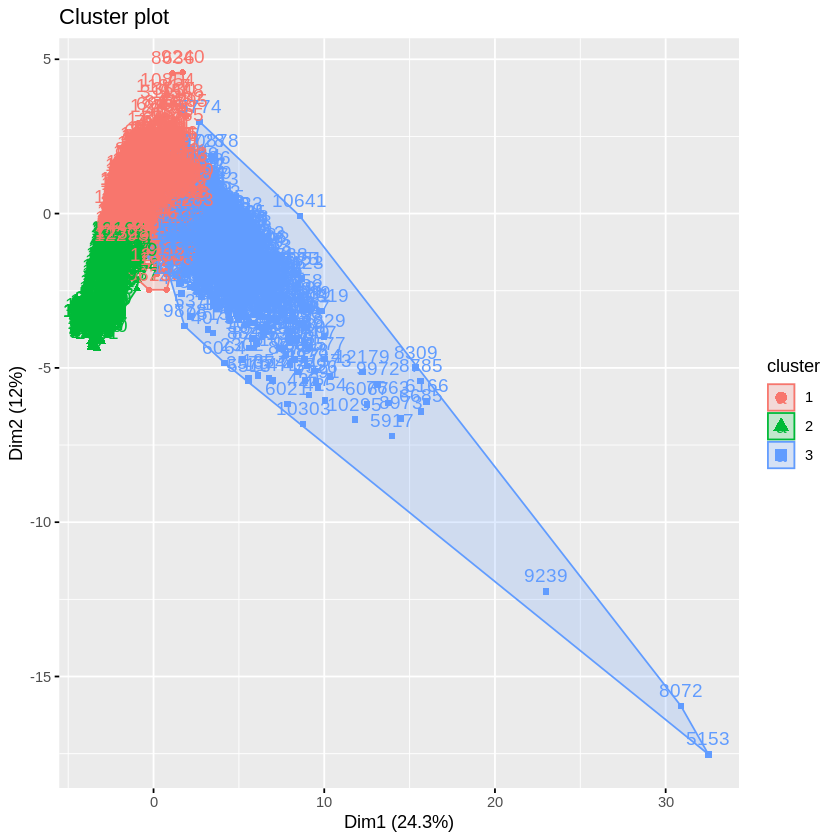

In [36]:
# Let’s visualize the cluster we have created, so far.

fviz_cluster(shop_K3, data = shopNorm)

* Above are the three clusters visualized
* cluster 3 has occupied the largest portion 
* K-means clustering requires that you specify in advance the number of clusters to extract. 
* A plot of the total within-groups sums of squares against the number of clusters in a k-means solution can be helpful.

In [37]:
# Between clusters sum of square

shop_K3$betweenss

[1] 43273.26

In [38]:
# Total sum of square

shop_K3$totss

[1] 172606

In [39]:
# Because the number of clusters (k) must be set before we start the algorithm, 
# it is often advantageous to use several different values of k and examine the differences in the results.
# We can execute the same process for 2, 4, 5 and 6 clusters

shop_K2 <- kmeans(shopNorm, centers = 2, nstart = 25)
shop_K4 <- kmeans(shopNorm, centers = 4, nstart = 25)
shop_K5 <- kmeans(shopNorm, centers = 5, nstart = 25)
shop_K6 <- kmeans(shopNorm, centers = 6, nstart = 25)

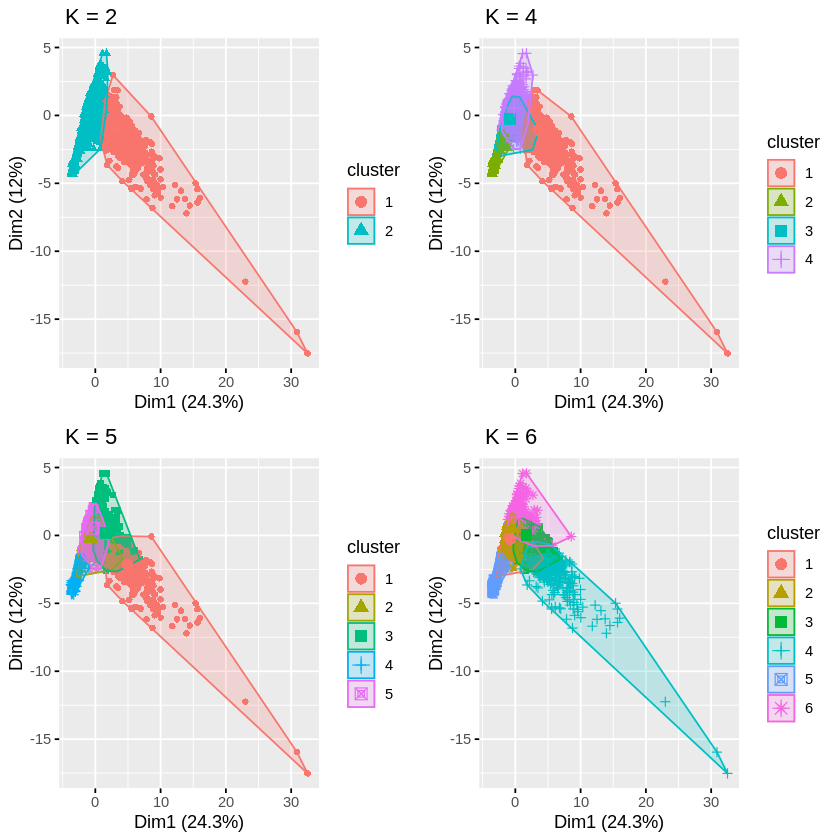

In [40]:
# We can plot these clusters for different K value to compare.
# And the results are shown in the figures below

p1 <- fviz_cluster(shop_K2, geom = "point", data = shopNorm) + ggtitle(" K = 2")
p2 <- fviz_cluster(shop_K4, geom = "point", data = shopNorm) + ggtitle(" K = 4")
p3 <- fviz_cluster(shop_K5, geom = "point", data = shopNorm) + ggtitle(" K = 5")
p4 <- fviz_cluster(shop_K6, geom = "point", data = shopNorm) + ggtitle(" K = 6")

grid.arrange(p1, p2, p3, p4, nrow = 2)

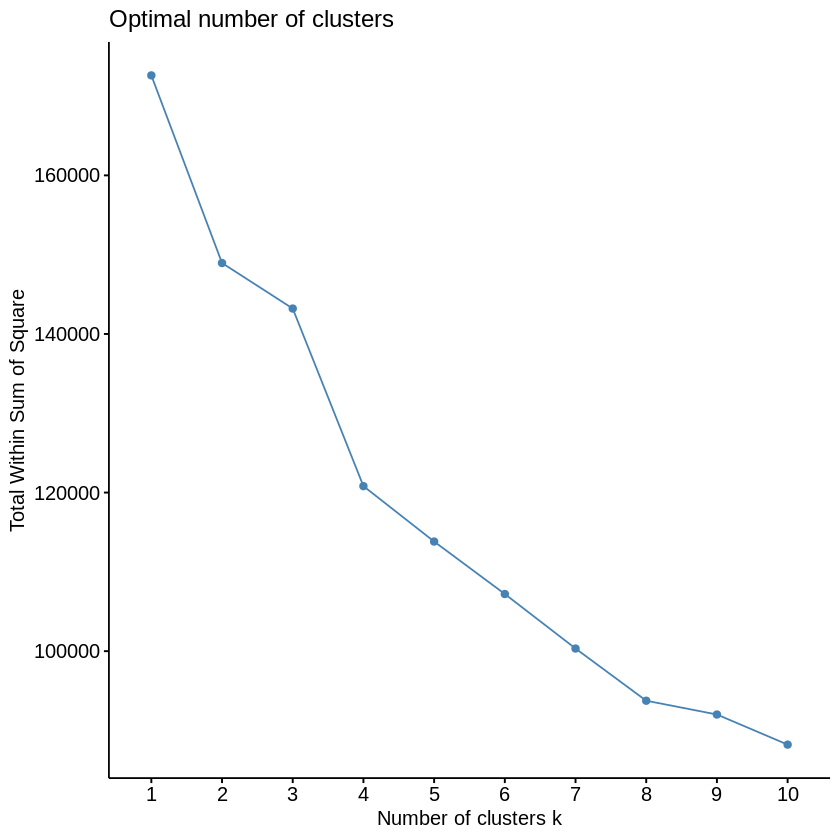

In [41]:
 # A bend in the graph can suggest the appropriate number of clusters.

# Determining Optimal clusters (k) Using Elbow method

fviz_nbclust(x = shopNorm,FUNcluster = kmeans, method = 'wss' )

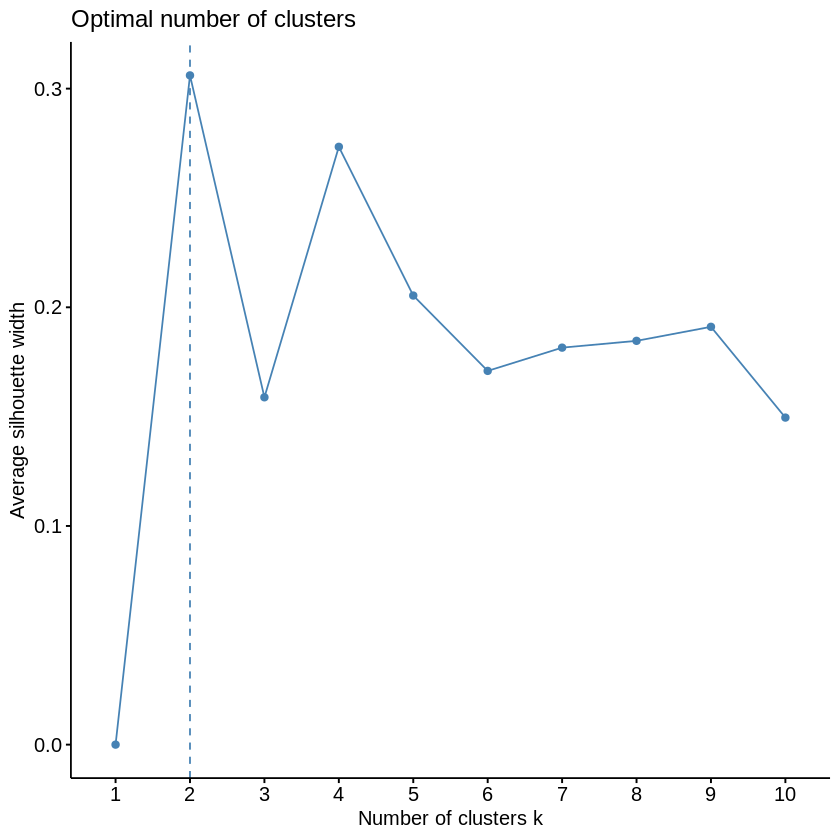

In [42]:
# Determining Optimal clusters (k) Using Average Silhouette Method

fviz_nbclust(x = shopNorm,FUNcluster = kmeans, method = 'silhouette' )

* The best cluster / optimal cluster is represented by a cluster of K = 2

In [43]:
# Compute k-means clustering with k = 2 since its the optimal for the k means

set.seed(123)
final <- kmeans(shopNorm, centers = 2, nstart = 25)
print(final)

K-means clustering with 2 clusters of sizes 1862, 10468

Cluster means:
  Administrative Administrative_Duration Informational Informational_Duration
1      1.4736521                1.214653     1.4274915               1.105420
2     -0.2621265               -0.216057    -0.2539157              -0.196627
  ProductRelated ProductRelated_Duration BounceRates   ExitRates  PageValues
1      1.3545752                1.263930 -0.33081045 -0.49203878  0.21341800
2     -0.2409456               -0.224822  0.05884305  0.08752161 -0.03796182
   SpecialDay OperatingSystems     Browser      Region TrafficType
1 -0.16679405     -0.019388495 -0.08065930 -0.06628081 -0.11562181
2  0.02966856      0.003448737  0.01434731  0.01178973  0.02056628

Clustering vector:
    [1] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
   [37] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 1 2 2 2 2 2
   [73] 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
  

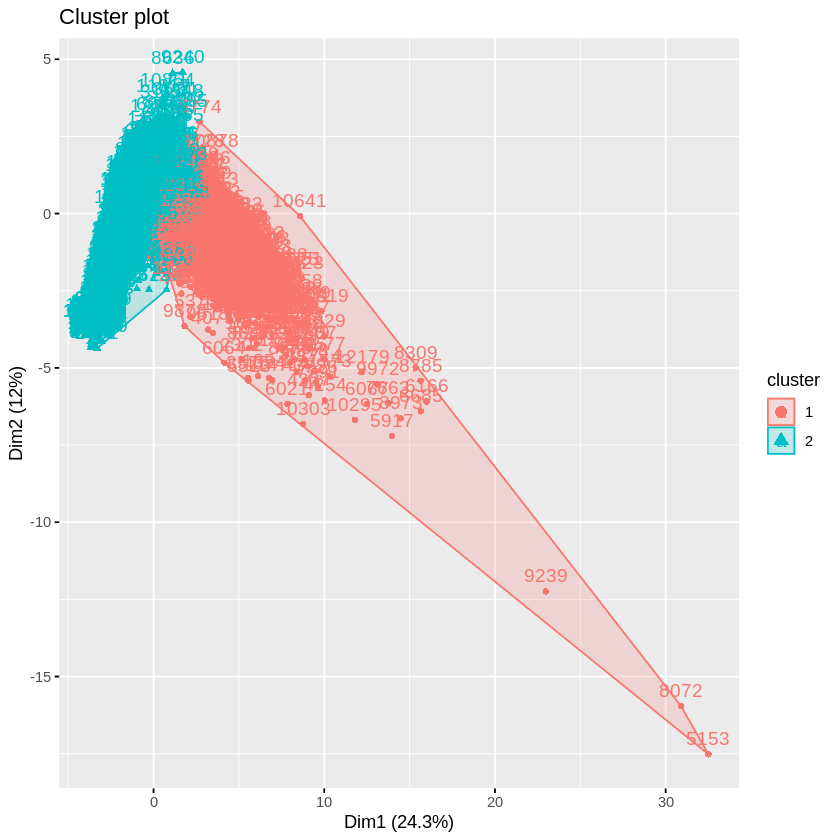

In [44]:
# We can visualize the results using the below code.

fviz_cluster(final, data = shopNorm)

In [45]:
# We can extract the clusters and add to our initial data to do some descriptive statistics at the cluster level

shopNorm %>% 
  mutate(Cluster = final$cluster) %>%
  group_by(Cluster) %>%
  summarize_all('median')

Cluster,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1.4099337,0.6415837,1.1779886,0.2699455,0.8599135,0.7611050,-0.3766743,-0.5326031,-0.224853,-0.3088088,-0.1360728,-0.2079435,-0.06136105,-0.5141613
2,-0.6979497,-0.4577177,-0.3968399,-0.2451687,-0.3770124,-0.3839837,-0.4066834,-0.2975502,-0.317165,-0.3088088,-0.1360728,-0.2079435,-0.06136105,-0.2657246


# Hierarchial Clustering

### Type 1

In [46]:
# Still using the same dataset as for the K-Means clustering

shop_new1<- shop[, c(1, 2, 3, 4,5,6,7,8,9,10,12,13,14,15)]
head(shop_new1)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>
1,0,0,0,0,1,0.000000,0.20000000,0.2000000,0,0,1,1,1,1
2,0,0,0,0,2,64.000000,0.00000000,0.1000000,0,0,2,2,1,2
3,0,-1,0,-1,1,-1.000000,0.20000000,0.2000000,0,0,4,1,9,3
4,0,0,0,0,2,2.666667,0.05000000,0.1400000,0,0,3,2,2,4
5,0,0,0,0,10,627.500000,0.02000000,0.0500000,0,0,3,3,1,4
6,0,0,0,0,19,154.216667,0.01578947,0.0245614,0,0,2,2,1,3


In [47]:
# We can normalise the data using the mean and standard deviation, also we can use scale function to normalise our data.

shop_norm <- as.data.frame(scale(shop_new1))
head(shop_norm)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-0.6979497,-0.4577177,-0.3968399,-0.2451687,-0.6918663,-0.6251222,3.6745644,3.2370784,-0.317165,-0.3088088,-1.2333763,-0.7902608,-0.8941422,-0.76259811
2,-0.6979497,-0.4577177,-0.3968399,-0.2451687,-0.6693767,-0.5916719,-0.4576990,1.1752117,-0.317165,-0.3088088,-0.1360728,-0.2079435,-0.8941422,-0.51416134
3,-0.6979497,-0.4633751,-0.3968399,-0.2522737,-0.6918663,-0.6256448,3.6745644,3.2370784,-0.317165,-0.3088088,2.0585344,-0.7902608,2.4369825,-0.26572458
4,-0.6979497,-0.4577177,-0.3968399,-0.2451687,-0.6693767,-0.6237284,0.5753668,1.9999584,-0.317165,-0.3088088,0.9612308,-0.2079435,-0.4777516,-0.01728781
5,-0.6979497,-0.4577177,-0.3968399,-0.2451687,-0.4894602,-0.2971523,-0.0444727,0.1442783,-0.317165,-0.3088088,0.9612308,0.3743739,-0.8941422,-0.01728781
6,-0.6979497,-0.4577177,-0.3968399,-0.2451687,-0.2870542,-0.5445191,-0.1314677,-0.3802316,-0.317165,-0.3088088,-0.1360728,-0.2079435,-0.8941422,-0.26572458


In [48]:
# we can compute some descriptive statistics
summary(shop_norm)

 Administrative    Administrative_Duration Informational    
 Min.   :-0.6979   Min.   :-0.46337        Min.   :-0.3968  
 1st Qu.:-0.6979   1st Qu.:-0.45772        1st Qu.:-0.3968  
 Median :-0.3968   Median :-0.41246        Median :-0.3968  
 Mean   : 0.0000   Mean   : 0.00000        Mean   : 0.0000  
 3rd Qu.: 0.5066   3rd Qu.: 0.06987        3rd Qu.:-0.3968  
 Max.   : 7.4325   Max.   :18.77033        Max.   :18.5011  
 Informational_Duration ProductRelated    ProductRelated_Duration
 Min.   :-0.2523        Min.   :-0.7144   Min.   :-0.6256        
 1st Qu.:-0.2452        1st Qu.:-0.5569   1st Qu.:-0.5283        
 Median :-0.2452        Median :-0.3095   Median :-0.3110        
 Mean   : 0.0000        Mean   : 0.0000   Mean   : 0.0000        
 3rd Qu.:-0.2452        3rd Qu.: 0.1402   3rd Qu.: 0.1401        
 Max.   :17.8682        Max.   :15.1408   Max.   :32.8114        
  BounceRates        ExitRates         PageValues        SpecialDay     
 Min.   :-0.4577   Min.   :-0.8867   M

In [49]:
# We now use the R function hclust() for hierarchical clustering
# ---
# 

# First we use the dist() function to compute the Euclidean distance between observations, 
# d will be the first argument in the hclust() function dissimilarity matrix
# ---
#
d <- dist(shop_norm, method = "euclidean")

In [50]:
# We then use hierarchical clustering using the Ward's method
# ---
# 
res.hc <- hclust(d, method = "ward.D2" )

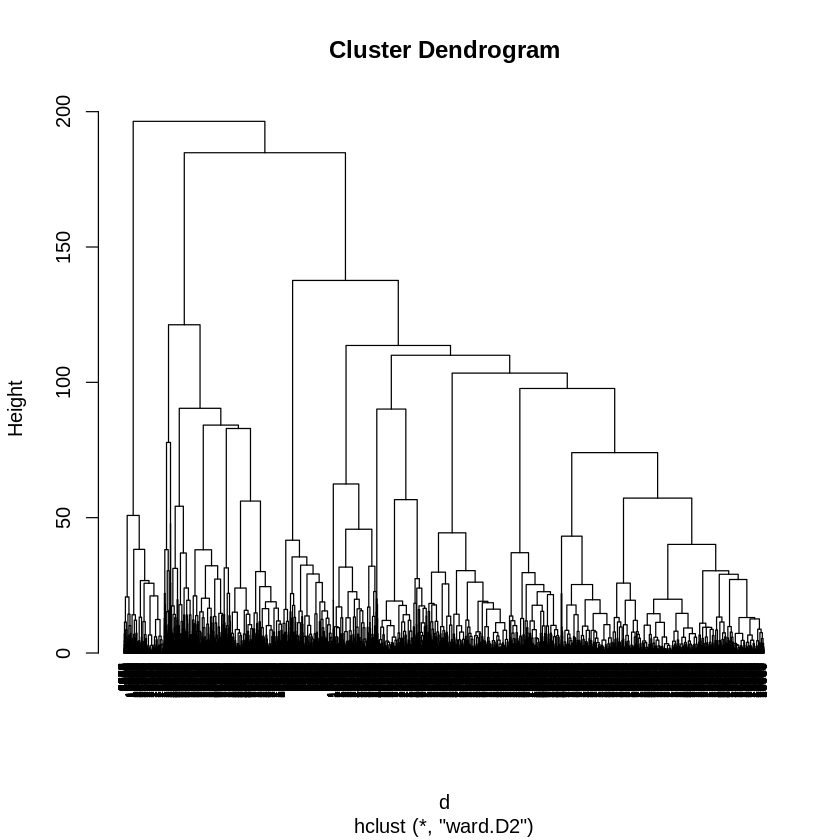

In [51]:
# Lastly, we plot the obtained dendrogram
# ---
# 
plot(res.hc, cex = 0.6, hang = -1)

### Type 2

In [52]:
# Note that this dataset has most of the columns as numerical values. 
# There are no missing values in this dataset that you need to clean before clustering. 
# But the scales of the features are different and you need to normalize it.
# You will now store the labels in a separate variable and exclude the Revenue 
# column from your dataset in order to do clustering

shop_1 <- shop
Revenue_label <- shop_1$Revenue
shop_1$Revenue <- NULL
str(shop_1)

# The revenue column is dropped already

'data.frame':	12330 obs. of  17 variables:
 $ Administrative         : num  0 0 0 0 0 0 0 1 0 0 ...
 $ Administrative_Duration: num  0 0 -1 0 0 0 -1 -1 0 0 ...
 $ Informational          : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Informational_Duration : num  0 0 -1 0 0 0 -1 -1 0 0 ...
 $ ProductRelated         : num  1 2 1 2 10 19 1 1 2 3 ...
 $ ProductRelated_Duration: num  0 64 -1 2.67 627.5 ...
 $ BounceRates            : num  0.2 0 0.2 0.05 0.02 ...
 $ ExitRates              : num  0.2 0.1 0.2 0.14 0.05 ...
 $ PageValues             : num  0 0 0 0 0 0 0 0 0 0 ...
 $ SpecialDay             : num  0 0 0 0 0 0 0.4 0 0.8 0.4 ...
 $ Month                  : Factor w/ 10 levels "2","3","5","6",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ OperatingSystems       : int  1 2 4 3 3 2 2 1 2 2 ...
 $ Browser                : int  1 2 1 2 3 2 4 2 2 4 ...
 $ Region                 : int  1 1 9 2 1 1 3 1 2 1 ...
 $ TrafficType            : int  1 2 3 4 4 3 3 5 3 2 ...
 $ VisitorType            : Factor w/ 3 levels "1","

In [53]:
# Lets use R's scale() function to scale all your column values.

shop_new1<- shop_1[, c(1, 2, 3, 4,5,6,7,8,9,10,12,13,14,15)]
#shop_norm <- as.data.frame(scale(shop_new1))

shop_df_sc <- as.data.frame(scale(shop_new1))
summary(shop_df_sc)

# Notice the mean of all the columns is 0 and the standard deviation is 1.

 Administrative    Administrative_Duration Informational    
 Min.   :-0.6979   Min.   :-0.46337        Min.   :-0.3968  
 1st Qu.:-0.6979   1st Qu.:-0.45772        1st Qu.:-0.3968  
 Median :-0.3968   Median :-0.41246        Median :-0.3968  
 Mean   : 0.0000   Mean   : 0.00000        Mean   : 0.0000  
 3rd Qu.: 0.5066   3rd Qu.: 0.06987        3rd Qu.:-0.3968  
 Max.   : 7.4325   Max.   :18.77033        Max.   :18.5011  
 Informational_Duration ProductRelated    ProductRelated_Duration
 Min.   :-0.2523        Min.   :-0.7144   Min.   :-0.6256        
 1st Qu.:-0.2452        1st Qu.:-0.5569   1st Qu.:-0.5283        
 Median :-0.2452        Median :-0.3095   Median :-0.3110        
 Mean   : 0.0000        Mean   : 0.0000   Mean   : 0.0000        
 3rd Qu.:-0.2452        3rd Qu.: 0.1402   3rd Qu.: 0.1401        
 Max.   :17.8682        Max.   :15.1408   Max.   :32.8114        
  BounceRates        ExitRates         PageValues        SpecialDay     
 Min.   :-0.4577   Min.   :-0.8867   M

In [54]:
# building the distance matrix.
dist_mat <- dist(shop_df_sc, method = 'euclidean')

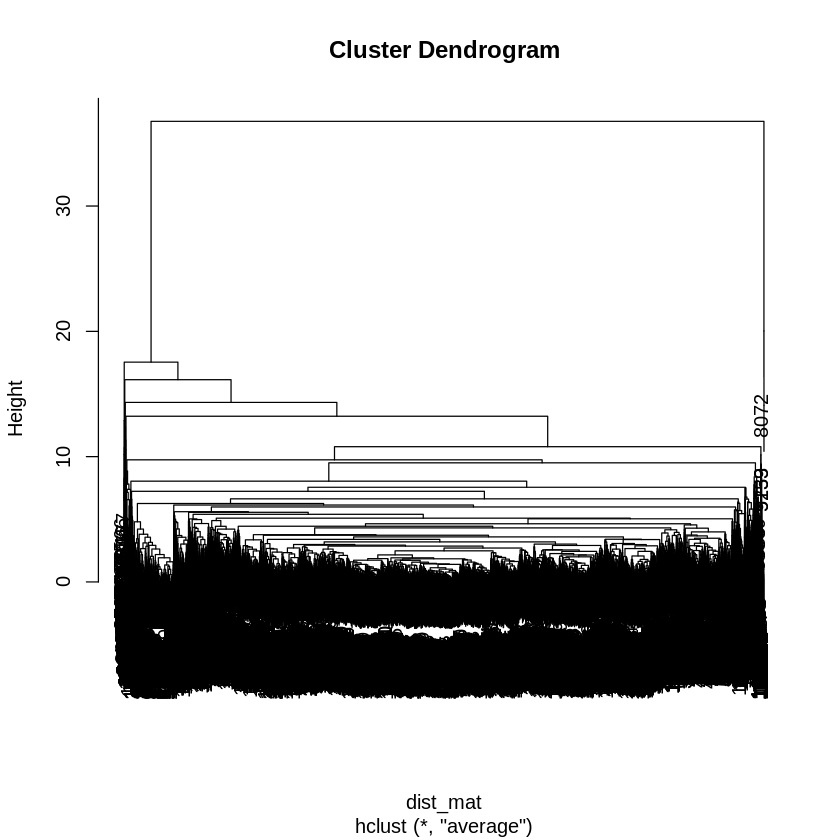

In [55]:
# building the dendrogram by plotting the hierarchical cluster object which you will build with hclust(). 
# You can specify the linkage method via the method argument.

hclust_avg <- hclust(dist_mat, method = 'average')
plot(hclust_avg)

# The dendrogram is built and every data point finally merges into a single cluster with the height(distance) shown on the y-axis.

In [56]:
# cut the dendrogram in order to create the desired number of clusters. 
# Since in this case you already know that there could be only two types of revenue response 
# you will choose the number of clusters to be k = 2, 
# or as you can see in the dendrogram h = 2 you get two clusters.

cut_avg <- cutree(hclust_avg, k = 2)

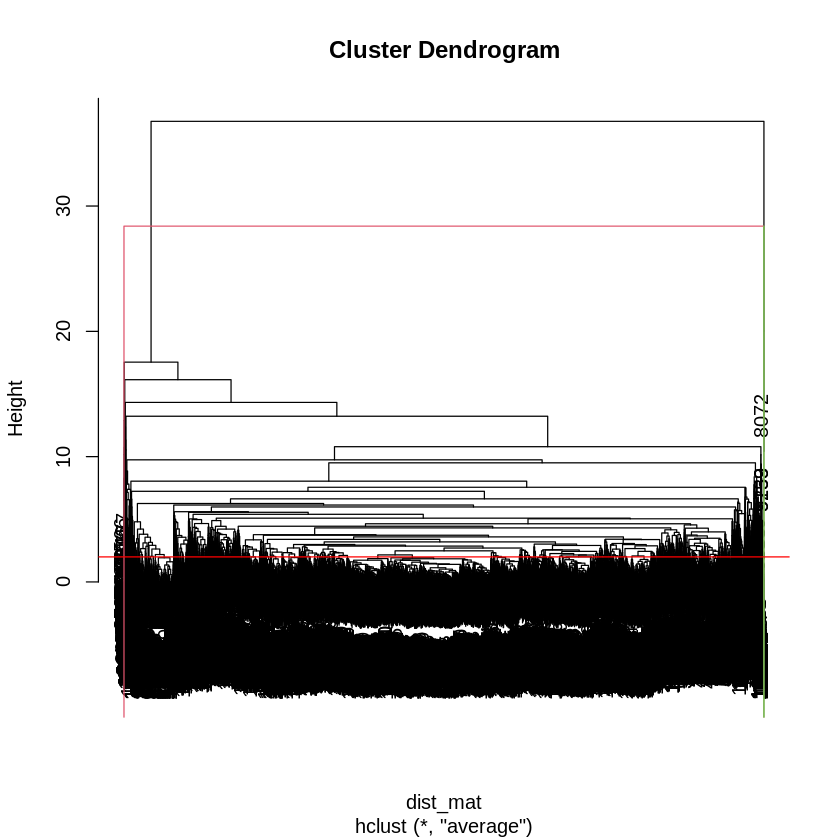

In [57]:
# To visually see the clusters on the dendrogram you can use R's abline() function 
# to draw the cut line and superimpose rectangular compartments for each cluster on the tree 
# with the rect.hclust()

plot(hclust_avg)
rect.hclust(hclust_avg , k = 2, border = 2:6)
abline(h = 2, col = 'red')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


---------------------
Welcome to dendextend version 1.14.0
Type citation('dendextend') for how to cite the package.

Type browseVignettes(package = 'dendextend') for the package vignette.
The github page is: https://github.com/talgalili/dendextend/

Suggestions and bug-reports can be submitted at: https://github.com/talgalili/dendextend/issues
Or contact: <tal.galili@gmail.com>

	To suppress this message use:  suppressPackageStartupMessages(library(dendextend))
---------------------



Attaching package: ‘dendextend’


The following object is masked from ‘package:stats’:

    cutree




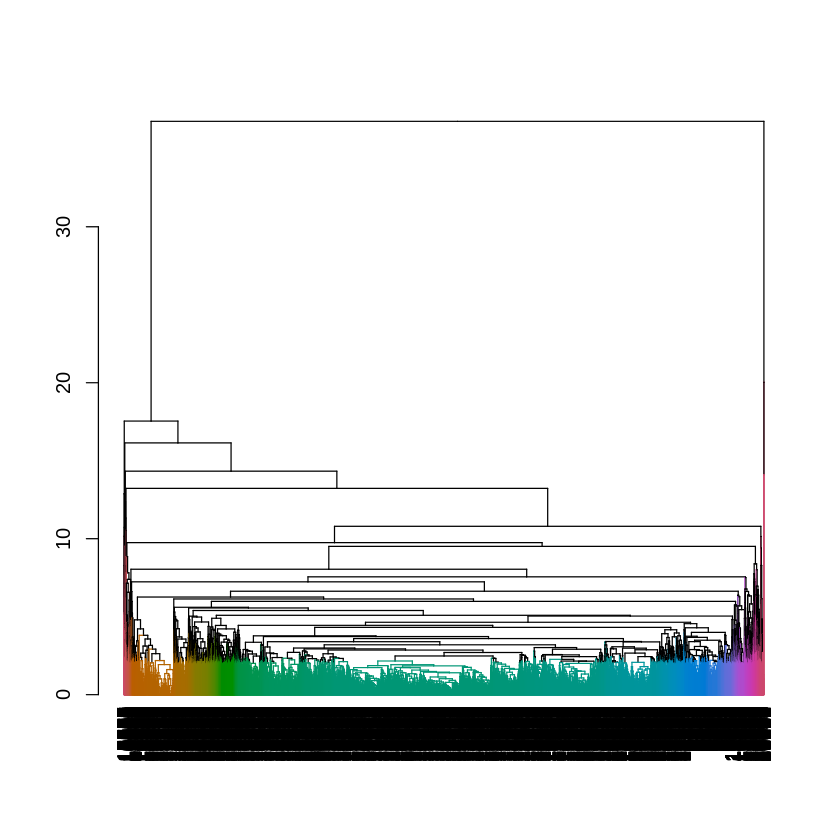

In [58]:
install.packages("dendextend")
library(dendextend)

avg_dend_obj <- as.dendrogram(hclust_avg)
avg_col_dend <- color_branches(avg_dend_obj, h = 2)
plot(avg_col_dend)

In [59]:

shop_df_cl <- mutate(shop_new1, cluster = cut_avg)
count(shop_df_cl,cluster)

cluster,n
<int>,<int>
1,12327
2,3


### Visualization on various columns

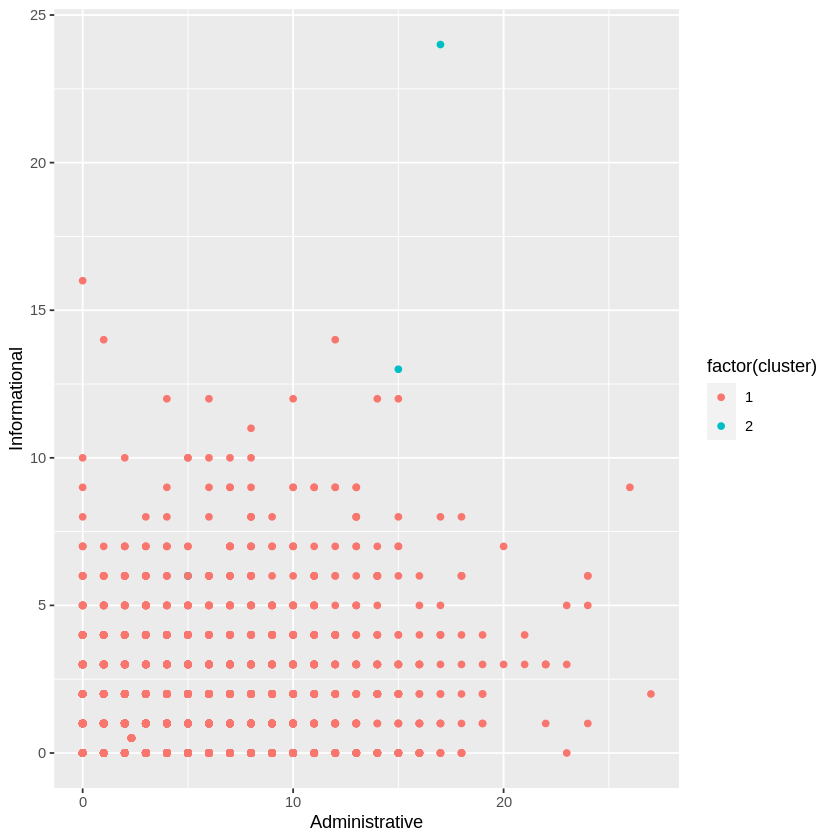

In [60]:

ggplot(shop_df_cl, aes(x=Administrative, y = Informational, color = factor(cluster))) + geom_point()

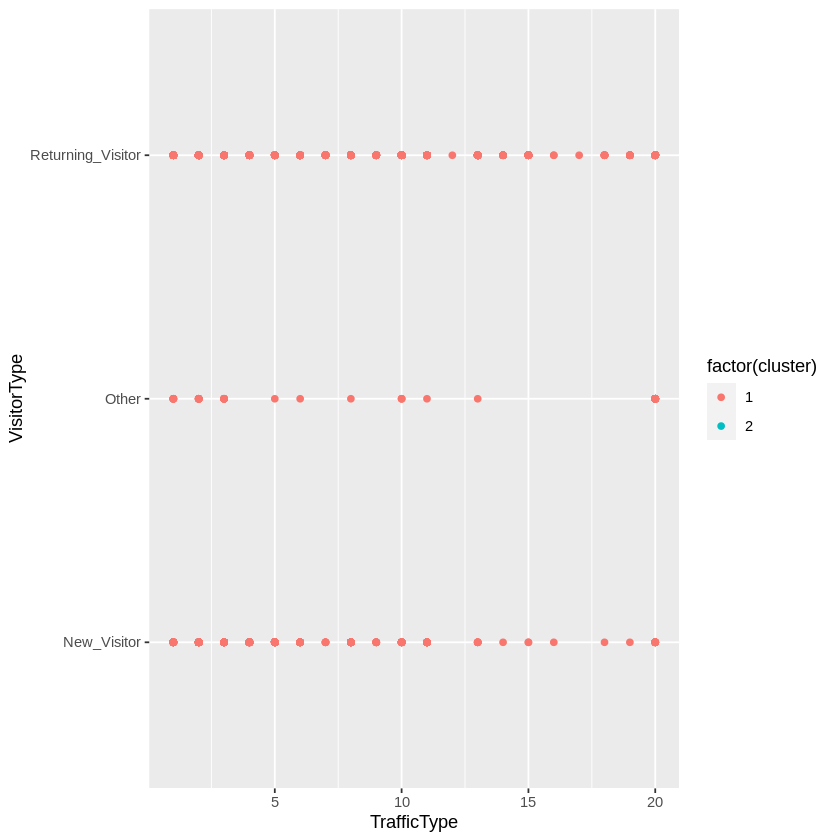

In [61]:
ggplot(shop_df_cl, aes(x=TrafficType, y = VisitorType, color = factor(cluster))) + geom_point()

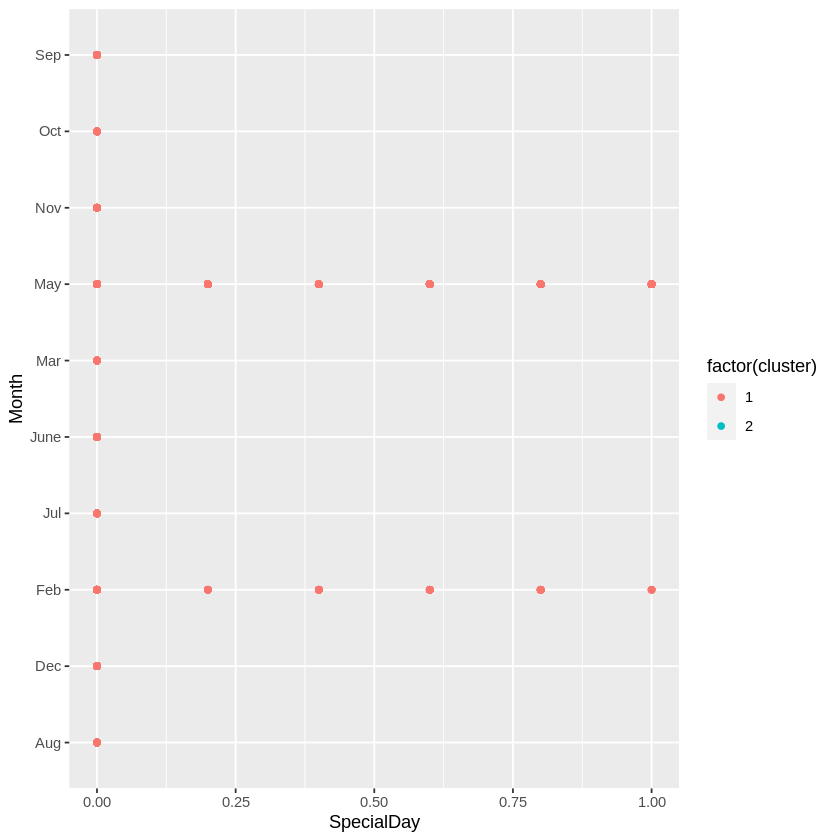

In [62]:
ggplot(shop_df_cl, aes(x=SpecialDay, y = Month, color = factor(cluster))) + geom_point()

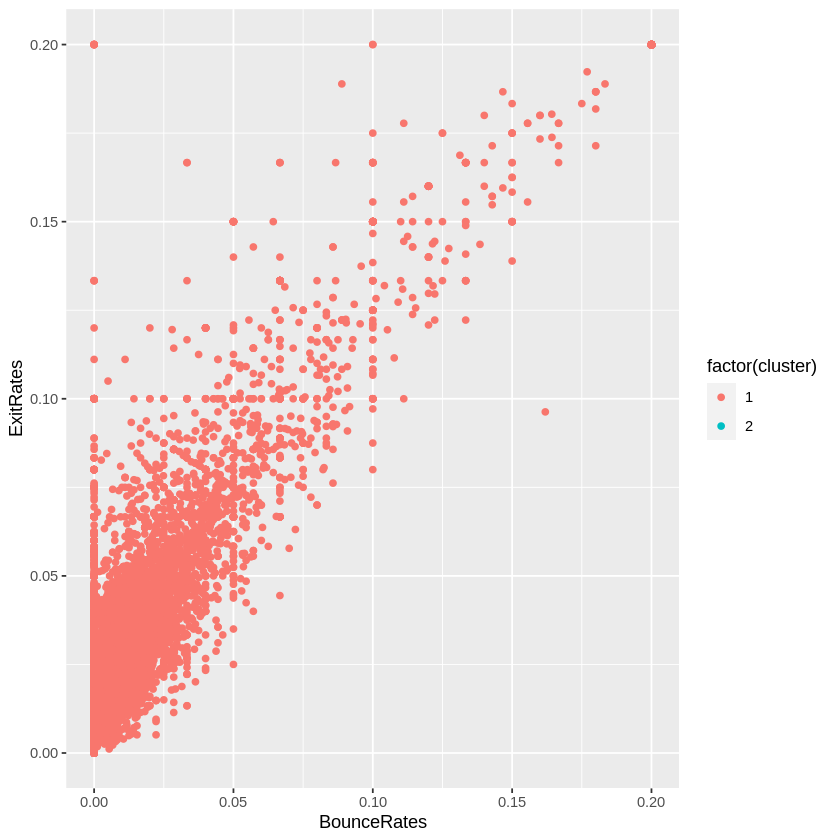

In [63]:
ggplot(shop_df_cl, aes(x=BounceRates, y = ExitRates, color = factor(cluster))) + geom_point()

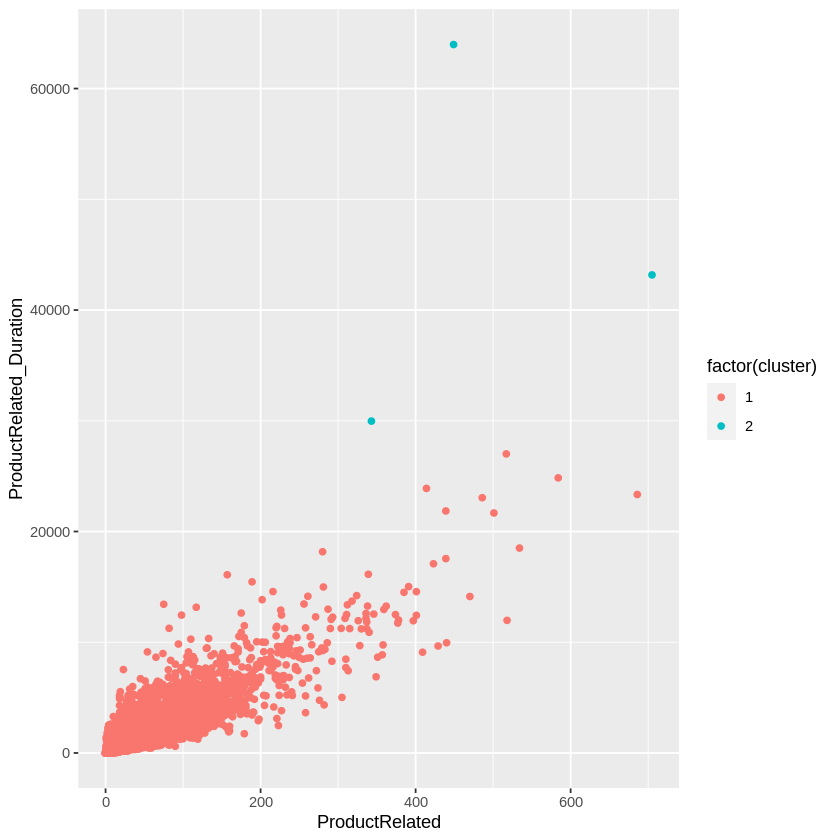

In [64]:
ggplot(shop_df_cl, aes(x=ProductRelated, y = ProductRelated_Duration, color = factor(cluster))) + geom_point()

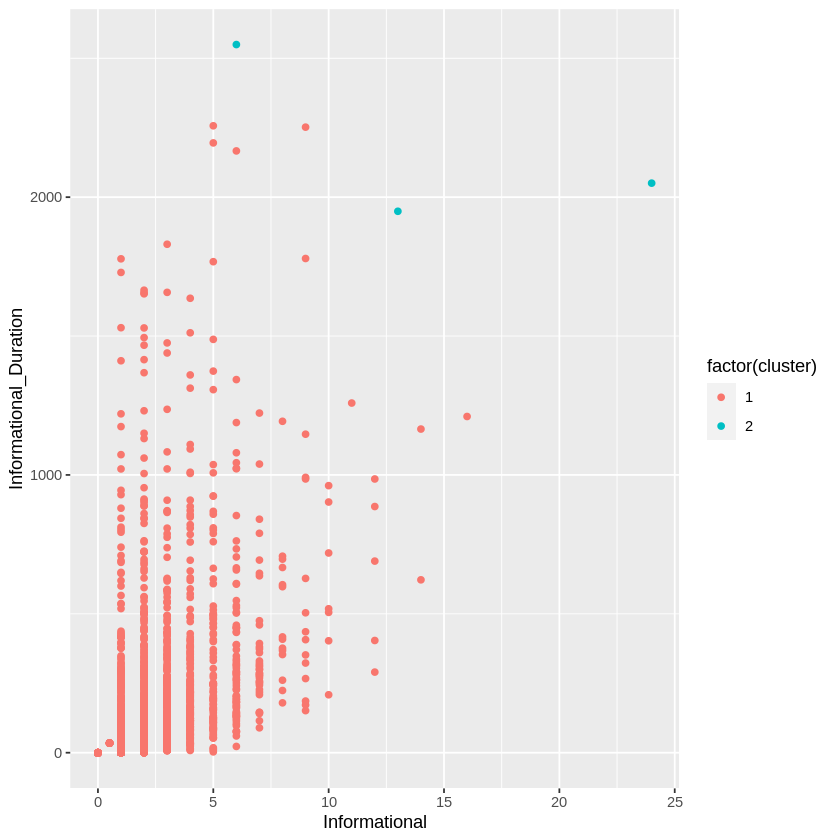

In [65]:
ggplot(shop_df_cl, aes(x=Informational, y = Informational_Duration, color = factor(cluster))) + geom_point()

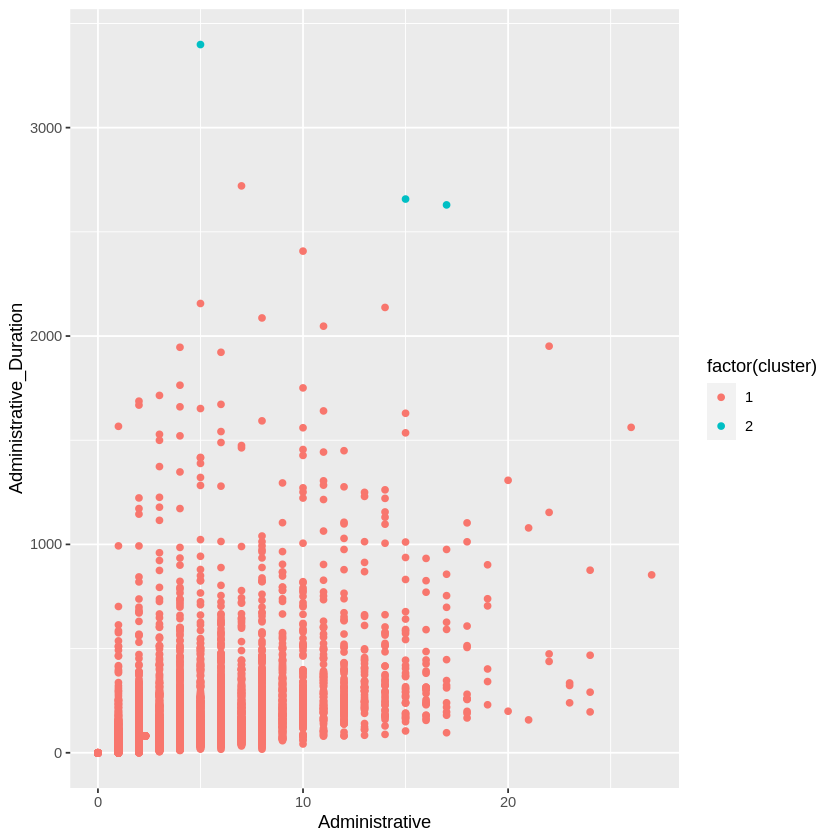

In [66]:
ggplot(shop_df_cl, aes(x=Administrative, y = Administrative_Duration, color = factor(cluster))) + geom_point()

In [67]:
table(shop_df_cl$cluster,Revenue_label)

   Revenue_label
    FALSE  TRUE
  1 10419  1908
  2     3     0

# Suprvised Learning

In [68]:
# Reading the first 6 rows of the shop dataset

head(shop)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<int>,<int>,<int>,<int>,<fct>,<fct>,<lgl>
1,0,0,0,0,1,0.000000,0.20000000,0.2000000,0,0,2,1,1,1,1,1,1,FALSE
2,0,0,0,0,2,64.000000,0.00000000,0.1000000,0,0,2,2,2,1,2,1,1,FALSE
3,0,-1,0,-1,1,-1.000000,0.20000000,0.2000000,0,0,2,4,1,9,3,1,1,FALSE
4,0,0,0,0,2,2.666667,0.05000000,0.1400000,0,0,2,3,2,2,4,1,1,FALSE
5,0,0,0,0,10,627.500000,0.02000000,0.0500000,0,0,2,3,3,1,4,1,2,FALSE
6,0,0,0,0,19,154.216667,0.01578947,0.0245614,0,0,2,2,2,1,3,1,1,FALSE


## Multiple linear regression

In [69]:
head(shop)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<int>,<int>,<int>,<int>,<fct>,<fct>,<lgl>
1,0,0,0,0,1,0.000000,0.20000000,0.2000000,0,0,2,1,1,1,1,1,1,FALSE
2,0,0,0,0,2,64.000000,0.00000000,0.1000000,0,0,2,2,2,1,2,1,1,FALSE
3,0,-1,0,-1,1,-1.000000,0.20000000,0.2000000,0,0,2,4,1,9,3,1,1,FALSE
4,0,0,0,0,2,2.666667,0.05000000,0.1400000,0,0,2,3,2,2,4,1,1,FALSE
5,0,0,0,0,10,627.500000,0.02000000,0.0500000,0,0,2,3,3,1,4,1,2,FALSE
6,0,0,0,0,19,154.216667,0.01578947,0.0245614,0,0,2,2,2,1,3,1,1,FALSE


In [70]:
names(shop)

[1] "Administrative"          "Administrative_Duration"
 [3] "Informational"           "Informational_Duration" 
 [5] "ProductRelated"          "ProductRelated_Duration"
 [7] "BounceRates"             "ExitRates"              
 [9] "PageValues"              "SpecialDay"             
[11] "Month"                   "OperatingSystems"       
[13] "Browser"                 "Region"                 
[15] "TrafficType"             "VisitorType"            
[17] "Weekend"                 "Revenue"

In [71]:
# Computing model coefficients

model <- lm(Revenue ~ Administrative + Administrative_Duration + Informational + Informational_Duration + ProductRelated + ProductRelated_Duration + BounceRates + ExitRates + PageValues + SpecialDay + Month + OperatingSystems + Browser + Region + TrafficType + VisitorType + Weekend, data = shop)
summary(model)

# To compute multiple regression using all of the predictors in the data set, simply type this:
# model <- lm(Revenue ~., data = shop)

# If you want to perform the regression using all of the variables except one, say Administrative_Duration, type this:
# model <- lm(Revenue ~. -Administrative_Duration , data = shop)


Call:
lm(formula = Revenue ~ Administrative + Administrative_Duration + 
    Informational + Informational_Duration + ProductRelated + 
    ProductRelated_Duration + BounceRates + ExitRates + PageValues + 
    SpecialDay + Month + OperatingSystems + Browser + Region + 
    TrafficType + VisitorType + Weekend, data = shop)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.46474 -0.14244 -0.07379 -0.00912  0.99432 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)              6.764e-02  2.478e-02   2.729 0.006355 ** 
Administrative           1.856e-03  1.160e-03   1.601 0.109498    
Administrative_Duration -1.606e-05  2.025e-05  -0.793 0.427629    
Informational            3.380e-03  2.935e-03   1.152 0.249535    
Informational_Duration   1.523e-05  2.535e-05   0.601 0.547855    
ProductRelated           2.305e-04  1.313e-04   1.756 0.079110 .  
ProductRelated_Duration  1.030e-05  2.998e-06   3.437 0.000590 ***
BounceRates         

* It can be seen that p-value of the F-statistic is < 2.2e-16, which is highly significant. This means that, at least, one of the predictor variables is significantly related to the outcome variable

In [72]:
# which predictor variables are significant, you can examine the coefficients table, 
# which shows the estimate of regression beta coefficients and the associated t-statitic p-values

summary(model)$coefficient

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),6.764469e-02,2.478413e-02,2.7293554,6.354848e-03
Administrative,1.855961e-03,1.159562e-03,1.6005705,1.094978e-01
Administrative_Duration,-1.606311e-05,2.024894e-05,-0.7932815,4.276291e-01
Informational,3.380048e-03,2.935258e-03,1.1515335,2.495352e-01
Informational_Duration,1.523250e-05,2.534550e-05,0.6009942,5.478550e-01
ProductRelated,2.304987e-04,1.312623e-04,1.7560164,7.911049e-02
ProductRelated_Duration,1.030358e-05,2.997957e-06,3.4368686,5.904269e-04
BounceRates,4.803172e-01,1.443293e-01,3.3279263,8.775168e-04
ExitRates,-1.021060e+00,1.522025e-01,-6.7085670,2.051532e-11
PageValues,8.944311e-03,1.524216e-04,58.6813864,0.000000e+00


* The t-statistic evaluates whether or not there is significant association between the predictor and the outcome variable, that is whether the beta coefficient of the predictor is significantly different from zero
* It can be seen that, changing in Administrative, Informational, Informational_Duration, ProductRelated, ProductRelated_Duration, BounceRates, PageValues, Months(3,5,6,7,8,9,10,11,12), Browser, VisitorType2 and Weekend2 are significantly associated to changes in revenue while changes in Administrative_Duration, ExitRates, SpecialDay, OperatingSystems, Region, TrafficType and VisitorType3 are not significantly associated with revenue.

In [73]:
# Since changes in Administrative_Duration, ExitRates, SpecialDay, OperatingSystems, Region, TrafficType and VisitorType3
# variables are not significant, it is possible to remove it from the model

model_1 <- lm(Revenue ~ Administrative  + Informational + Informational_Duration + ProductRelated + ProductRelated_Duration + BounceRates  + PageValues  + Month  + Browser  + VisitorType + Weekend, data = shop)
summary(model_1)


Call:
lm(formula = Revenue ~ Administrative + Informational + Informational_Duration + 
    ProductRelated + ProductRelated_Duration + BounceRates + 
    PageValues + Month + Browser + VisitorType + Weekend, data = shop)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.50903 -0.14497 -0.06586 -0.02961  0.98622 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)              8.895e-03  2.312e-02   0.385  0.70050    
Administrative           2.544e-03  9.745e-04   2.611  0.00903 ** 
Informational            3.614e-03  2.938e-03   1.230  0.21860    
Informational_Duration   1.457e-05  2.539e-05   0.574  0.56609    
ProductRelated           3.643e-04  1.276e-04   2.856  0.00430 ** 
ProductRelated_Duration  9.119e-06  2.911e-06   3.133  0.00174 ** 
BounceRates             -4.048e-01  6.012e-02  -6.734 1.73e-11 ***
PageValues               9.089e-03  1.512e-04  60.114  < 2e-16 ***
Month3                   2.670e-02  2.371e-02   1.126  0

* Finally, our model equation can be written as follows: Revenue =  8.895e-03 +  2.544e-03*Administrative  + 3.614e-03*Informational + 1.457e-05*Informational_Duration + 3.643e-04*ProductRelated + 9.119e-06*ProductRelated_Duration + 9.089e-03*PageValues  + 2.670e-02*Month3 + 2.102e-02*Month5 + 2.858e-02*Month6 + 6.693e-02*Month7 + 6.524e-02*Month8 + 6.140e-02*Month9 + 7.044e-02*Month10 + 1.283e-01*Month11 + 1.492e-02*Month12 + 3.009e-03*Browser  + 5.784e-02*VisitorType2 + 9.065e-03*Weekend2.

In [74]:
# The overall quality / accuracy of the model can be assessed by examining the R-squared (R2) and Residual Standard Error (RSE).
# The R2 = 0.2849, meaning that 28.49% of the variance in the measure of revenue can be predicted by the variables in model_1.
# RSE estimate gives a measure of error of prediction
# The error rate can be estimated by dividing the RSE by the mean outcome variable

sigma(model_1)/mean(shop$Revenue)

[1] 1.97803

In [75]:
# The confidence interval of the model coefficient can be extracted as follow:

confint(model_1)

,2.5 %,97.5 %
(Intercept),-3.643259e-02,5.422212e-02
Administrative,6.343768e-04,4.454589e-03
Informational,-2.144029e-03,9.372712e-03
Informational_Duration,-3.519737e-05,6.433578e-05
ProductRelated,1.142824e-04,6.143925e-04
ProductRelated_Duration,3.412940e-06,1.482523e-05
BounceRates,-5.226451e-01,-2.869724e-01
PageValues,8.793022e-03,9.385780e-03
Month3,-1.978002e-02,7.318019e-02
Month5,-2.454249e-02,6.659113e-02


## KNN

In [76]:
# Shape of the dataset

dim(shop)

[1] 12330    18

In [77]:
# Fitting a summary of our dataset

summary(shop)

 Administrative   Administrative_Duration Informational   
 Min.   : 0.000   Min.   :  -1.00         Min.   : 0.000  
 1st Qu.: 0.000   1st Qu.:   0.00         1st Qu.: 0.000  
 Median : 1.000   Median :   8.00         Median : 0.000  
 Mean   : 2.318   Mean   :  80.91         Mean   : 0.504  
 3rd Qu.: 4.000   3rd Qu.:  93.26         3rd Qu.: 0.000  
 Max.   :27.000   Max.   :3398.75         Max.   :24.000  
                                                          
 Informational_Duration ProductRelated   ProductRelated_Duration
 Min.   :  -1.00        Min.   :  0.00   Min.   :   -1.0        
 1st Qu.:   0.00        1st Qu.:  7.00   1st Qu.:  185.3        
 Median :   0.00        Median : 18.00   Median :  601.1        
 Mean   :  34.51        Mean   : 31.76   Mean   : 1196.0        
 3rd Qu.:   0.00        3rd Qu.: 38.00   3rd Qu.: 1464.2        
 Max.   :2549.38        Max.   :705.00   Max.   :63973.5        
                                                                
  Bounce

In [78]:
# Storing it as data frame

data <- data.frame(shop)

In [79]:
# Creating a random number equal 90% of total number of rows

random <- sample(1:nrow(data),0.9 * nrow(data))

# The normalization function is created

noramilzation <-function(x) { (x -min(x))/(max(x)-min(x))   }

In [80]:
# Normalization function is applied to the dataframe

data_noralized <- as.data.frame(lapply(data[,c(1, 2, 3, 4,5,6,7,8,9,10,12,13,14,15)], noramilzation))

In [81]:
# The training dataset extracted
data_train <- data_noralized[random,]

# The test dataset extracted
data_test <- data_noralized[-random,]

In [82]:
# The 16th column of training dataset because that is what we need to predict about testing dataset
# also convert ordered factor to normal factor

data_target <- as.factor(data[random,16])

In [83]:
# The actual values of 6th column of testing dataset to compaire it with values that will be predicted
# also convert ordered factor to normal factor

test_target <- as.factor(data[-random,16])

In [84]:
# Running the knn function

library(class)
pr <- knn(data_train,data_test,cl=data_target,k=20)

In [85]:
# Creating the confucion matrix

Confussion_Matrix <- table(pr,test_target)
Confussion_Matrix

   test_target
pr     1    2    3
  1 1036  159    3
  2   15   18    0
  3    0    0    2

In [86]:
# Checking the accuracy

accuracy <- function(x){sum(diag(x)/(sum(rowSums(x)))) * 100}
accuracy(Confussion_Matrix)

[1] 85.64477

In [87]:
# Test accuracy rate

sum(diag(Confussion_Matrix)/sum(Confussion_Matrix))

# Test error rate
1 - sum(diag(Confussion_Matrix)/sum(Confussion_Matrix))

# As you may notice, test accuracy rate + test error rate = 1, and I’m providing multiple ways of calculating each value.

[1] 0.8564477

[1] 0.1435523

* Our model has archieved a 85.64% accuracy score
* we have an error of 14.36%

## Decision Tree

In [88]:
# Load the party package. It will automatically load other

install.packages("party")
library(party)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘TH.data’, ‘libcoin’, ‘multcomp’, ‘mvtnorm’, ‘modeltools’, ‘strucchange’, ‘coin’, ‘zoo’, ‘sandwich’


Loading required package: grid

Loading required package: mvtnorm

Loading required package: modeltools

Loading required package: stats4

Loading required package: strucchange

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: sandwich


Attaching package: ‘strucchange’


The following object is masked from ‘package:stringr’:

    boundary




In [90]:
# Shape of the dataset
dim(shop)

[1] 12330    18

In [91]:
# Creating the input data frame.

input.dat <- shop[c(1:1205),]

In [93]:
# Creating the tree.
  output.tree <- ctree(
  Revenue ~ Administrative + Administrative_Duration + Informational + Informational_Duration + ProductRelated +
  ProductRelated_Duration + BounceRates + ExitRates + PageValues + SpecialDay + Month + OperatingSystems + 
  Browser + Region + TrafficType + VisitorType + Weekend, 
  data = input.dat)

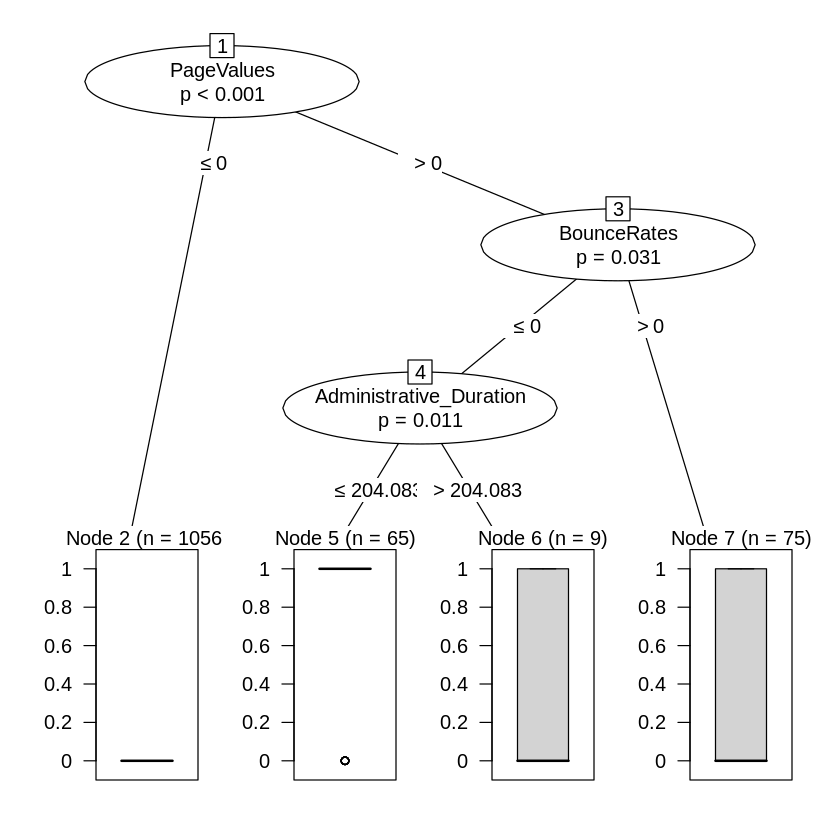

In [94]:
# Plotting the tree.
plot(output.tree)

* Most of the rows are > 0 

## SVM

In [95]:
# We first install the caret package. 
# This package will be very helfpul in providing us with 
# direct access to various functions for training our model
# with various machine learning algorithms such 
# as KNN, SVM, Decision Tree, Linear Regression etc.
# ---
# 
install.packages('caret')
library(caret)

install.packages("kernlab")
library(kernlab)

install.packages("e1071")
library(e1071)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘iterators’, ‘gower’, ‘ipred’, ‘timeDate’, ‘foreach’, ‘ModelMetrics’, ‘recipes’, ‘pROC’


Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘kernlab’


The following object is masked from ‘package:modeltools’:

    prior


The following object is masked from ‘package:psych’:

    alpha


The following object is masked from ‘package:purrr’:

    cross


The following object is masked from ‘package:ggplot2’:

    alpha


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [96]:
# Reading the first 6 rows of the shop dataset

head(shop)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<int>,<int>,<int>,<int>,<fct>,<fct>,<lgl>
1,0,0,0,0,1,0.000000,0.20000000,0.2000000,0,0,2,1,1,1,1,1,1,FALSE
2,0,0,0,0,2,64.000000,0.00000000,0.1000000,0,0,2,2,2,1,2,1,1,FALSE
3,0,-1,0,-1,1,-1.000000,0.20000000,0.2000000,0,0,2,4,1,9,3,1,1,FALSE
4,0,0,0,0,2,2.666667,0.05000000,0.1400000,0,0,2,3,2,2,4,1,1,FALSE
5,0,0,0,0,10,627.500000,0.02000000,0.0500000,0,0,2,3,3,1,4,1,2,FALSE
6,0,0,0,0,19,154.216667,0.01578947,0.0245614,0,0,2,2,2,1,3,1,1,FALSE


In [97]:
# We convert the clicked on ad variable into a categorical variable
# ---
# training[["Revenue"]] = factor(training[["Revenue"]])  ## Alt method to factor
 
shop$Revenue <- factor(shop$Revenue, levels = c("FALSE","TRUE"), labels = c("FALSE", "TRUE"))

In [98]:
# Next we split the data into training set and testing set. 
# NB: The training set will be used for model building while the testing set for model evaluation.
# ---
# - The “y” parameter takes the value of variable according to which data needs to be partitioned. 
# In our case, target variable is at Revenue, so we are passing shop$Revenue
# - The “p” parameter holds a decimal value in the range of 0-1. It’s to show the percentage of the split. 
# We are using p=0.7. It means that data split should be done in 70:30 ratio. 
# So, 70% of the data is used for training and the remaining 30% is for testing the model.
# - The “list” parameter is for whether to return a list or matrix. 
# We are passing FALSE for not returning a list
# ---
# 
intrain <- createDataPartition(y = shop$Revenue, p= 0.7, list = FALSE)
training <- shop[intrain,]
testing <- shop[-intrain,]

In [99]:
# We check the dimensions of out training dataframe and testing dataframe
# ---
# 
dim(training); 
dim(testing);

[1] 8632   18

[1] 3698   18

In [100]:
# The traincontrol() method
trctrl <- trainControl(method = "repeatedcv", number = 10, repeats = 3)

# Passing the trainControl() on our traun() method

svm_Linear <- train(Revenue ~., data = training, method = "svmLinear",
trControl=trctrl,
preProcess = c("center", "scale"),
tuneLength = 10)

In [101]:
# We can then check the reult of our train() model as shown below
# 
svm_Linear

Support Vector Machines with Linear Kernel 

8632 samples
  17 predictor
   2 classes: 'FALSE', 'TRUE' 

Pre-processing: centered (26), scaled (26) 
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 7768, 7768, 7770, 7770, 7768, 7770, ... 
Resampling results:

  Accuracy   Kappa    
  0.8872801  0.4697801

Tuning parameter 'C' was held constant at a value of 1

* We have a 88.72% accuracy score 
* The diagonal sum / Cohen's kappa is the diagonal sum of the (possibly weighted) relative frequencies, corrected for expected values and standardized by its maximum value. And it has an accuracy of 46.97%

In [102]:
# We can use the predict() method for predicting results as shown below. 
# We pass 2 arguements, our trained model and our testing data frame.
# ---
# 
test_pred <- predict(svm_Linear, newdata = testing)
test_pred

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [13] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [25] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [37] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [49] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE TRUE  FALSE FALSE
  [61] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE TRUE 
  [73] FALSE FALSE FALSE FALSE FALSE FALSE FALSE TRUE  FALSE FALSE FALSE FALSE
  [85] TRUE  FALSE FALSE FALSE FALSE FALSE TRUE  FALSE FALSE FALSE FALSE FALSE
  [97] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [109] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [121] FALSE FALSE FALSE FALSE FALSE FALSE FALSE TRUE  FALSE FALSE FALSE FALSE
 [133] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [145] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [157] FALSE FALSE FALSE FALSE FALSE TRUE  FALSE FALSE FALSE FALSE FALSE FALSE
 [169] FALSE FALSE FALSE FALSE TRUE  FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [181] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE TRUE  FALSE FALSE FALSE
 [193] FALSE FALSE FALSE FALSE FALSE FALSE FALSE TRUE  FALSE FALSE FALSE FALSE
 [205] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [217] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [229] FALSE FALSE TRUE  FALSE TRUE  TRUE  FALSE FALSE FALSE FALSE FALSE FALSE
 [241] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [253] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [265] FALSE TRUE  FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [277] FALSE FALSE FALSE TRUE  TRUE  FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [289] FALSE FALSE FALSE FALSE FALSE FALSE FALSE TRUE  FALSE FALSE FALSE FALSE
 [301] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [313] FALSE FALSE FALSE FALSE FALSE FALSE FALSE TRUE  FALSE FALSE FALSE TRUE 
 [325] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [337] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [349] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [361] TRUE  FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [373] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [385] FALSE FALSE FALSE TRUE  FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [397] FALSE FALSE FALSE FALSE FALSE TRUE  FALSE FALSE FALSE TRUE  FALSE FALSE
 [409] FALSE TRUE  FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [421] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [433] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [445] FALSE FALSE FALSE FALSE TRUE  FALSE FALSE FALSE FALSE FALSE FALSE TRUE 
 [457] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [469] FALSE FALSE FALSE FALSE FALSE FALSE FALSE TRUE  FALSE FALSE FALSE FALSE
 [481] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [493] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [505] FALSE FALSE FALSE FALSE FALSE FALSE FALSE TRUE  FALSE FALSE FALSE FALSE
 [517] FALSE TRUE  FALSE FALSE FALSE FALSE FALSE TRUE  FALSE FALSE FALSE FALSE
 [529] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [541] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [553] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE TRUE 
 [565] TRUE  FALSE FALSE FALSE FALSE FALSE TRUE  FALSE FALSE FALSE FALSE FALSE
 [577] FALSE FALSE TRUE  FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [589] FALSE FALSE FALSE TRUE  FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [601] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALS

In [103]:
# Now checking for our accuracy of the test_pred model by using a confusion matrix 
# ---
# 
confusionMatrix(table(test_pred, testing$Revenue))

Confusion Matrix and Statistics

         
test_pred FALSE TRUE
    FALSE  3037  350
    TRUE     89  222
                                          
               Accuracy : 0.8813          
                 95% CI : (0.8704, 0.8915)
    No Information Rate : 0.8453          
    P-Value [Acc > NIR] : 2.287e-10       
                                          
                  Kappa : 0.442           
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.9715          
            Specificity : 0.3881          
         Pos Pred Value : 0.8967          
         Neg Pred Value : 0.7138          
             Prevalence : 0.8453          
         Detection Rate : 0.8213          
   Detection Prevalence : 0.9159          
      Balanced Accuracy : 0.6798          
                                          
       'Positive' Class : FALSE           
                                  

* The output shows that our model accuracy for test set is 88.13%
* The accuracy score has imprpoved for the predicted variables

## Naive Bayes

### Naive bayes with e1071 package

In [105]:
# Splitting data into training and test data sets
# ---
# 
indxTrain <- createDataPartition(y = shop$Revenue,p = 0.7,list = FALSE)
training <- shop[indxTrain,]
testing <- shop[-indxTrain,] 
 

In [106]:
# Checking dimensions of the split
# ---
#
prop.table(table(shop$Revenue)) * 100
prop.table(table(training$Revenue)) * 100
prop.table(table(testing$Revenue)) * 100


   FALSE     TRUE 
84.52555 15.47445 


   FALSE     TRUE 
84.52271 15.47729 


   FALSE     TRUE 
84.53218 15.46782 

In [107]:
dim(shop)

[1] 12330    18

In [108]:
# Comparing the outcome of the training and testing phase
# ---
# Creating objects x which holds the predictor variables and y which holds the response variables
# ---
#
x = training[,-18]
y = training$Revenue

# The e1071 package was already installed while working with the svm model

In [109]:
# Naive bayes receives contigency table

model <- naiveBayes(Revenue ~ ., data = shop)
model


Naive Bayes Classifier for Discrete Predictors

Call:
naiveBayes.default(x = X, y = Y, laplace = laplace)

A-priori probabilities:
Y
    FALSE      TRUE 
0.8452555 0.1547445 

Conditional probabilities:
       Administrative
Y           [,1]     [,2]
  FALSE 2.120845 3.201547
  TRUE  3.393606 3.730527

       Administrative_Duration
Y            [,1]     [,2]
  FALSE  73.84371 170.9989
  TRUE  119.48324 201.1147

       Informational
Y            [,1]     [,2]
  FALSE 0.4523178 1.211384
  TRUE  0.7861635 1.521176

       Informational_Duration
Y           [,1]     [,2]
  FALSE 30.27645 133.9059
  TRUE  57.61143 171.6191

       ProductRelated
Y           [,1]     [,2]
  FALSE 28.75299 40.73408
  TRUE  48.21017 58.26737

       ProductRelated_Duration
Y           [,1]     [,2]
  FALSE 1071.515 1803.421
  TRUE  1876.210 2312.214

       BounceRates
Y              [,1]       [,2]
  FALSE 0.025271189 0.05178216
  TRUE  0.005117153 0.01218451

       ExitRates
Y             [,1]       [,2]

* The a-priori probabilities are the prior probability in Bayes theorem. Its the frequency each level of class occurs in the training dataset.

In [110]:
# The predict variables for the Revenue Column

predict(model, shop[sample(1:12330, 18, replace = FALSE),])

[1] FALSE TRUE  TRUE  TRUE  TRUE  FALSE TRUE  FALSE FALSE FALSE FALSE TRUE 
[13] TRUE  FALSE FALSE FALSE TRUE  FALSE
Levels: FALSE TRUE

In [111]:
# The respective attributes of the predicted column

predict(model, shop[sample(1:12330, 18, replace = FALSE),], type = "raw")

FALSE,TRUE
1.000000000,3.041903e-79
0.990384637,9.615363e-03
0.817747663,1.822523e-01
0.941817406,5.818259e-02
0.990316871,9.683129e-03
0.187346857,8.126531e-01
0.990931040,9.068960e-03
0.982272091,1.772791e-02
0.999961755,3.824523e-05
0.001816324,9.981837e-01


### Naive bayes with Caret package

In [112]:
install.packages('caret')
library(caret)

install.packages('caretEnsemble')
library(caretEnsemble)

install.packages('klaR')
library(klaR)

install.packages('randomForest')
library(randomForest)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘pbapply’



Attaching package: ‘caretEnsemble’


The following object is masked from ‘package:ggplot2’:

    autoplot


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘R.methodsS3’, ‘R.oo’, ‘R.utils’, ‘httpuv’, ‘xtable’, ‘sourcetools’, ‘fastmap’, ‘R.cache’, ‘shiny’, ‘miniUI’, ‘styler’, ‘classInt’, ‘labelled’, ‘combinat’, ‘questionr’


Loading required package: MASS


Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:gridExtra’:

    combine


T

In [113]:
# Splitting data into training and test data sets
# ---
# 
indxTrain <- createDataPartition(y = shop$Revenue,p = 0.7,list = FALSE)
training <- shop[indxTrain,]
testing <- shop[-indxTrain,] 

In [114]:
# The dataframe dat should be split inro the predictor dataframe and the outcome vector. 

x = training[,-18]
y = training$Revenue

In [115]:
# Now building our model 
# The model is trained using the train function
#

modell <- train(x,y,trControl=trainControl(method='cv',number=10))
modell

Random Forest 

8632 samples
  17 predictor
   2 classes: 'FALSE', 'TRUE' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 7769, 7769, 7768, 7768, 7769, 7768, ... 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa    
   2    0.9017617  0.5599897
   9    0.9015309  0.5885656
  17    0.9002545  0.5860153

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was mtry = 2.

* Below is an alternative method 

In [116]:
# set up 10-fold cross validation procedure
train_control <- trainControl(
  method = "cv", 
  number = 10
  )
  
# train model
nb.m1 <- train(
  x = x,
  y = y,
  #method = "nb",
  trControl = train_control
  )

# This one line will generate a Naive Bayes model, using 10-fold cross-validation. 
# From above, x is the attributes and y is the labels. 
# The ‘nb’ tells the trainer to use Naive Bayes. 
# The trainController part tells the trainer to use cross-validataion (‘cv’) with 10 folds.

In [117]:
# results
confusionMatrix(nb.m1)

Cross-Validated (10 fold) Confusion Matrix 

(entries are percentual average cell counts across resamples)
 
          Reference
Prediction FALSE TRUE
     FALSE  81.2  6.3
     TRUE    3.3  9.2
                            
 Accuracy (average) : 0.9038


# Conclusion

* The K-means clustering is more eyesthetic compared to hierarchial cluster i.e. the essence that visualization of the k-means clusters are shown in a neat box with each variation of K from 2 to 6. While that of Hierarchial clustering is compacted with each cluster hence not providing a nice view to relate to each cluster
* The hieracrrchial cluster provided a sumamry table of
-- Revenue_label
--   FALSE  TRUE
--  1) 10419  1908
--  2)     3     0
* The K-means cluster provided a summary of
-- Within cluster sum of squares by cluster:
-- 77448.980 , 8606.305, 43277.452
--  (between_SS / total_SS =  25.1 %)
-* The cluster of K = 2 performed the best

* The Multiple linear regression privided a summry of
-- Residual standard error: 0.3061 on 12309 degrees of freedom
-- Multiple R-squared:  0.2849,	Adjusted R-squared:  0.2838 
-- F-statistic: 245.2 on 20 and 12309 DF,  p-value: < 2.2e-16
-- An SE of 28.49% was seen and the model didn't perform well and an RSE of 30.61%

* The KNN model had the following summary
-- Accuracy score of 85.64% 
--  Error score of 14.36%

* For Decision Trees
-- The page values had a p value of (p< 0.01)
-- The Bounce Rates had a p value of (p = 0.031)
-- The Administrative Duration had a p value of (p = 0.011)

* The SVM Model had the following conclusions
-- A 88.72% accuracy score
-- The diagonal sum / Cohen's kappa has an accuracy of 46.97%
* While the matrix had the following
-- A model accuracy for test set is 88.13%

* The dimensions for the Naive Bayes are 
--   FALSE : 84.52555    
-- TRUE : 15.47445 
* The confussion matrix had an Accuracy (average) : 0.9038 translating to 90.38%

## Follow Up Question 

* Which Model Performed the Best?
-- The Naive Bayes model performed the best since it has the largest accuracy score 